# Исследование данных о продажах компьютерных игр #

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**Цели исследования**

Выявить закономерности, определяющие успешность игры.

**Ход исследования**

Данные об играх я получу из файла `/datasets/games.csv`. О качестве данных ниичего не известно кроме того, что они могут быть неполными. Поэтому перед нчалом исследования понадобится провести обзор данных.

Я проверю данные на пропуски и ошибки, оценю их влияние на исследование. Затем, на этапе предобработки данных, я поищу взмоности заполнить пропуски исправить шибки данных, которые не приведут к искажению результата. Далее, создам необходимые столбцы и приступлю к проведению исследовательского анализа. После чего составлю портрет пльзователя каждого региона, проверю гипотезы и напишу общий вывод.

Таким образом, мое исследованиие пройдет в 7 этапов:
- Обзор данных
- Предбработка данных
- Расчеты и добавление данных в таблицу
- Проведение исследовательского анализа данных
- Составление портрета пользователя кадого региона
- Проверка гипотез - отличаются ли пользовательские рейтинги платформ Xbox One и PC, отличаются ли пользовательские рейтинги жанров Action и Sports.
- Написание общего вывода


## Чтение и знакомство с данными ##

Чтение файла и импорт бибилиотек:

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/games.csv', sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [ ]:
df.shape

(16715, 11)

В датасете 11 колонок, 16715строк. Есть пропуски:

- Name -2 пропуска
- Year_of_Release - 269 пропусков
- Genre - 2 пропуска
- Critic_Score - 8578 пропусков
- User_Score - 6701 пропуск
- Rating - 6766 прпусков

Нет пропусков в следующих столбцах:
- Platform
- NA_sales
- EU_sales
- JP_sales
- Other_sale

Посмотрим на проопуски в процентном соотношении

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


Посмотрим на данные в файле:

In [ ]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Явно видна проблема с типами данных в следующих столбцах:
- user_score - должен иметь вещественный тип данных
- year_of_release -  целочисленный


А также проблема с разнорегистровым наименованием колонок

Посмотрим на распеределение значений в данных

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


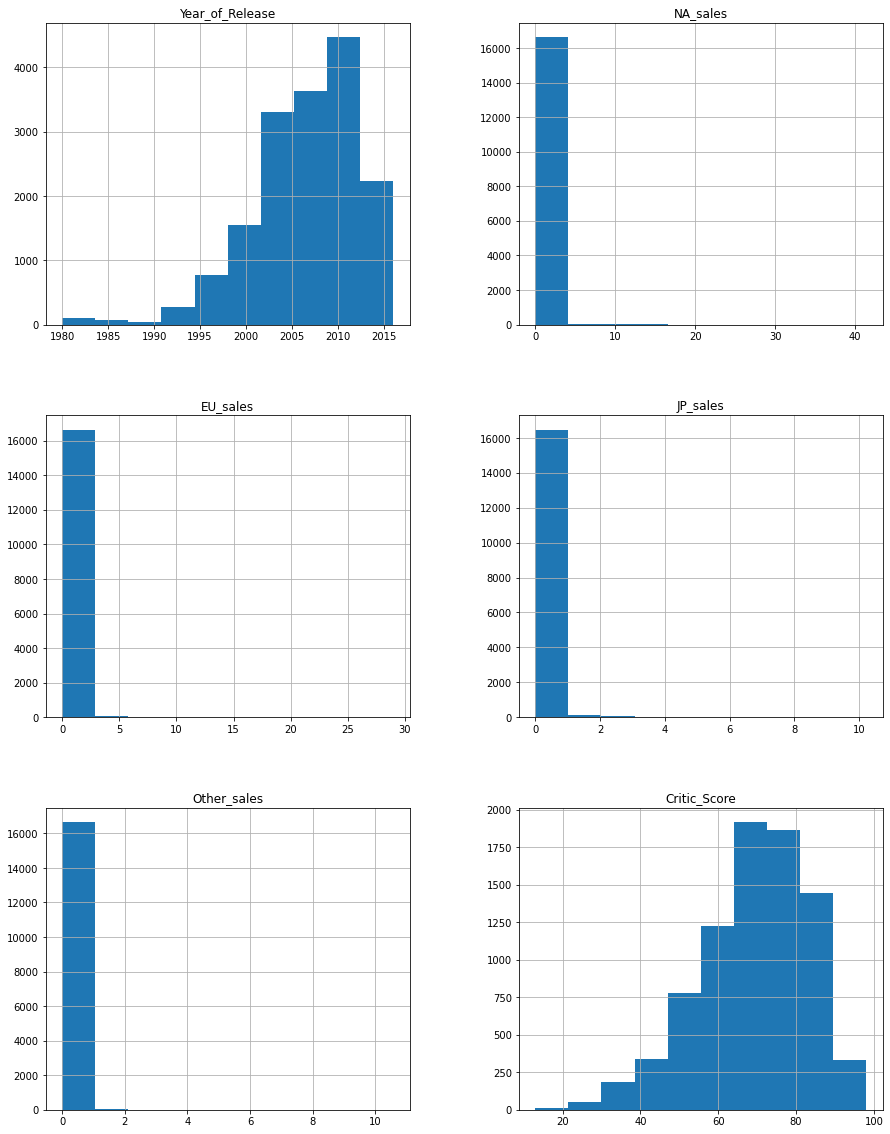

In [ ]:
df.hist(figsize = (15, 20));

Данные представлены с 1980 по 2016 года, большинство игр с 2002 по 2012года. Продажи в Северной Америке, Европе, Японии, других странах составляют в среднем от 0 до 0.24/0.11/0.04/0.03 млн копий соответственно. Оценка критиков в среднем от 60 до 79 баллов. примечательно, что максимума в 100 баллов не достигла ни одна игра в списке, совершенству нет предела.

**Вывод**

При первичном знакомстве с данными были выявлены проблемы:
- с наименованием колонок - разный регистр
- с типами данных в колонках Год релиза и Пользовательскя оценка
Их нужно будет исправить.

В колонках Наименование игры и Жанр всего по 2 пропуска -возмжно они связаны с проблемой перекодировки названия, нужно будет их обработать.

В колонке Год релиза пропусков не так много, возмоожно часть из них удастся закрыть либо по году релиза на альтернативной платформе(они редко сильно различаются)либо по году в наименовании игры (обычно год релиза на один год меньше или совпадает с этой датой, при условии, что она леит в диапазоне наших дат выхода игр).
Множество пропусков в оценках и рейтингах может быть связано с годом выхода игры, а также с отсутствием выпуска данной игры под регион, для которого определяется ESRB.

## Подготовка данных ##

Приведем наименования столбцов в датасете к нижнему регистру:

In [ ]:
def columns_to_lower(table):
    lower_columns = []
    for col in table.columns:
        lower_columns.append(col.lower())
    table.columns =lower_columns
    return table

df = columns_to_lower(df)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим, какие значения лежат в столбце user_score

In [ ]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
2.3       2
1.1       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

<AxesSubplot:>

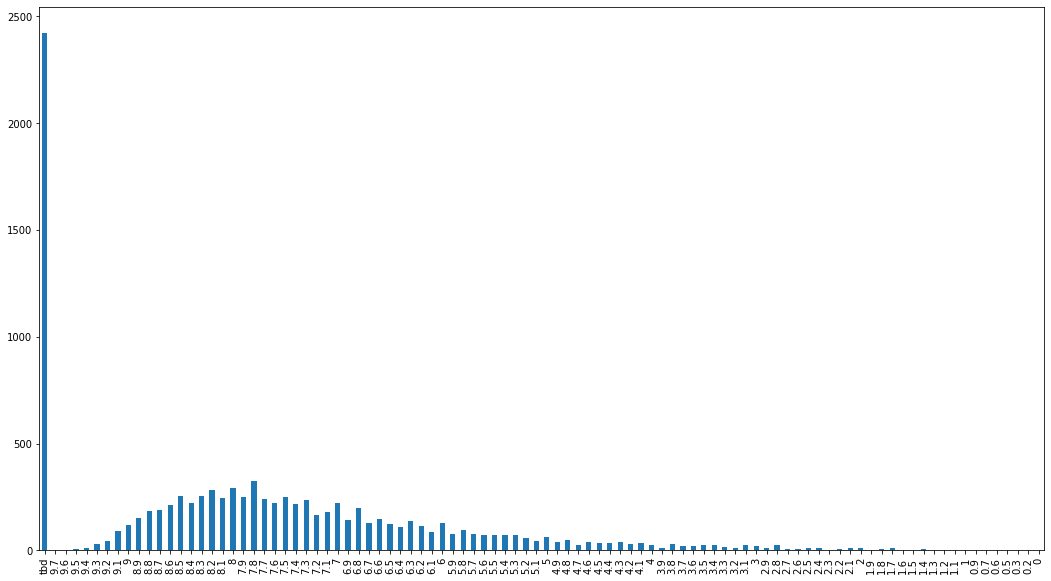

In [ ]:
df['user_score'].value_counts().sort_index(ascending = False).plot(kind = 'bar',figsize = (18,10))

Очень много значений "tmb",  в среде компьютерных игр данная аббревиатура означает "To be determinated", То есть "Будет определено". Обычно используется, когда игра еще не вышла, но в данном случае видимо ее выход ничего не изменил и оценка осталась незаполненной. Нет смысла сохранять данное значение, это такое же отсутствие оценки, как и Nan.
Посмотрим на распределение значений, без учета такой оценки:

<AxesSubplot:>

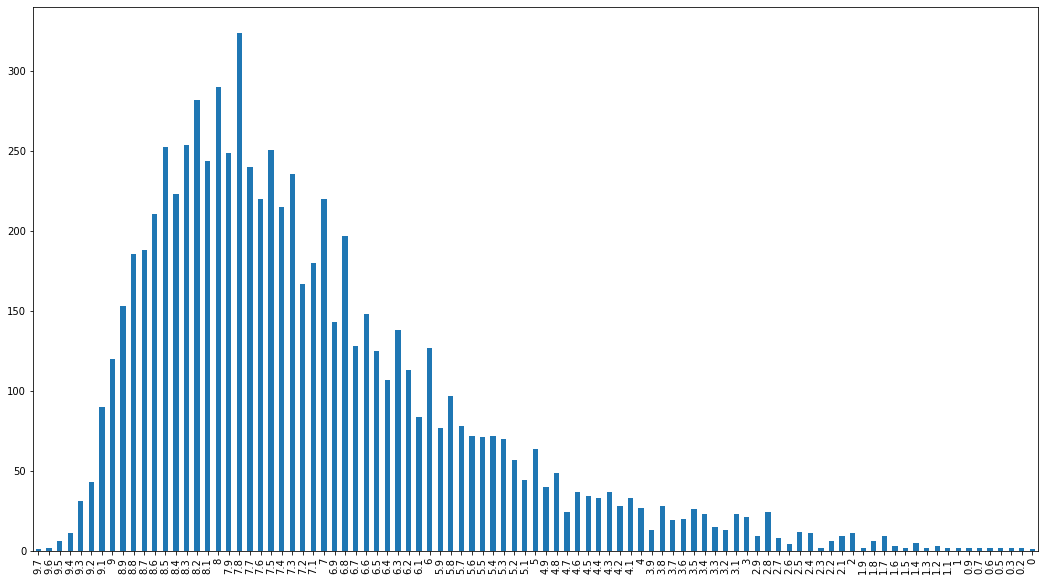

In [ ]:
df[df['user_score']!='tbd']['user_score'].value_counts().sort_index(ascending = False).plot(kind = 'bar',figsize = (18,10))

И распределние сразу выглядит нормальным с медианой в районе 7,5. Заменим все знаечния 'tmb' на Nan,  а после приведем тип колонки к вещественному типу:

In [ ]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', np.NAN)

In [ ]:
df['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.3      2
2.3      2
1.1      2
9.7      1
0        1
Name: user_score, Length: 95, dtype: int64

In [ ]:
df['user_score'] = df['user_score'].astype(float)

А теперь займемся годом релиза.Посмотрим,какие значения в ней есть, попробуем заполнить год выпуска для начала у тех игр, для которых он есть у другой платформы.

In [ ]:
df['year_of_release'].value_counts().sort_index(ascending = False)

2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: year_of_release, dtype: int64

In [ ]:
df['year_of_release'].value_counts().sort_index(ascending = False)

2016.0     502
2015.0     606
2014.0     581
2013.0     544
2012.0     653
2011.0    1136
2010.0    1255
2009.0    1426
2008.0    1427
2007.0    1197
2006.0    1006
2005.0     939
2004.0     762
2003.0     775
2002.0     829
2001.0     482
2000.0     350
1999.0     338
1998.0     379
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1992.0      43
1991.0      41
1990.0      16
1989.0      17
1988.0      15
1987.0      16
1986.0      21
1985.0      14
1984.0      14
1983.0      17
1982.0      36
1981.0      46
1980.0       9
Name: year_of_release, dtype: int64

Заодно можно отметить, что игр с 1993 и раньше настолько мало, что можно отбрсоить их из рассмотрения, если окажется, что и на прочие данные они так же скупы.

In [ ]:
def find_game_year(game):
    year = df.loc[(df['name'] == game) & ~(df['year_of_release'].isna())]['year_of_release'].median()
    return year

df.loc[df['year_of_release'].isna(),'year_of_release'] = df['name'].apply(find_game_year)

In [ ]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Уже 146 пропусков. Посмотрим,какие игры остались:

In [ ]:
df[df['year_of_release'].isna()]['name'].value_counts()

Rock Band                                     4
Test Drive Unlimited 2                        3
Virtua Quest                                  2
Port Royale 3                                 2
Robert Ludlum's The Bourne Conspiracy         2
                                             ..
WarioWare: Twisted!                           1
Charm Girls Club: My Fashion Mall             1
Dream Trigger 3D                              1
Flag Capture                                  1
Writing and Speaking Beautiful Japanese DS    1
Name: name, Length: 133, dtype: int64

Посмотрим, есть ли те, у кого год указан в конце названия и заберем его в год релиза

In [ ]:
 df.loc[(df['year_of_release'].isna()) & (df.name.str.contains('(20[0-9][0-9])$', regex= True))]

/opt/conda/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
13195,Tour de France 2011,X360,NaN,Racing,0.00,0.04,0.00,0.01,46.0,7.6,NaN
13929,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN


In [ ]:
df.loc[(df['year_of_release'].isna()) & (df.name.str.contains('(20[0-9][0-9])$', regex= True)),'year_of_release'] = df.loc[(df['year_of_release'].isna()) & (df.name.str.contains('(20[0-9][0-9])$', regex= True)),'name'].str.extract('(20[0-9][0-9])$').agg(' '.join, axis=1)

/opt/conda/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
print(df[df['year_of_release'].isna()])

                                           name platform year_of_release  \
627                                   Rock Band     X360             NaN   
657    Frogger's Adventures: Temple of the Frog      GBA             NaN   
805                                   Rock Band      Wii             NaN   
1142                                  Rock Band      PS3             NaN   
1301                             Triple Play 99       PS             NaN   
...                                         ...      ...             ...   
16277           Homeworld Remastered Collection       PC             NaN   
16288                                    Shorts       DS             NaN   
16348              Agarest Senki: Re-appearance      PS3             NaN   
16458               Hakuouki: Shinsengumi Kitan      PS3             NaN   
16522                              Virtua Quest       GC             NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
627    

Маленькая, но приятная победа. Пропусков менее 1%, больше добыть год издания нам негде, ориентироваться на него нам следует, так что лучше будет удалить эти данные. И спокойно привести данные к целочисленнному типу.

In [ ]:
df = df[~df['year_of_release'].isna()]
df['year_of_release'] = df['year_of_release'].astype(int)

/tmp/ipykernel_31/256755230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16576 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16576 non-null  object 
 2   year_of_release  16576 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16576 non-null  float64
 5   eu_sales         16576 non-null  float64
 6   jp_sales         16576 non-null  float64
 7   other_sales      16576 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посмотрим, что там за пропуски в Жанре и наименовании игр и не одни и те е ли это записи

In [ ]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, это одни и те же записи. Игрушка старенькая, рейтингов и оценок нет, от удаления 2 строк в мире станет чуть светлей.

In [ ]:
df = df[(~df['name'].isna()) & (~df['genre'].isna())]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     8079 non-null   float64
 9   user_score       7543 non-null   float64
 10  rating           9871 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посмотрим на значения в колонках наименований, платформ, рейтингов

In [ ]:
names = df['name'].sort_values().unique()
names[:70]

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ' Haikyu!! Cross Team Match!', ' Tales of Xillia 2', "'98 Koshien",
       '.hack//G.U. Vol.1//Rebirth', '.hack//G.U. Vol.2//Reminisce',
       '.hack//G.U. Vol.2//Reminisce (jp sales)',
       '.hack//G.U. Vol.3//Redemption', '.hack//Infection Part 1',
       '.hack//Link', '.hack//Mutation Part 2', '.hack//Outbreak Part 3',
       '.hack//Quarantine Part 4: The Final Chapter',
       '.hack: Sekai no Mukou ni + Versus', '007 Racing',
       '007: Quantum of Solace', '007: The World is not Enough',
       '007: Tomorrow Never Dies', '1 vs. 100', '1/2 Summer +',
       '10 Minute Solution', '100 All-Time Favorites',
       '100 Classic Books', '100 Classic Games',
       '1000 Cooking Recipes from ELLE à table', '1001 Touch Games',
       '101-in-1 Explosive Megamix', '101-in-1 Party Megamix Wii',
       '101-in-1 Sports Megamix', '101-in-1 Sports Party Megamix',
       '1080°: TenEighty Snowboarding', '11e

Кажется, неявные дубликаты здесь сможет искать толко прожженый геймер с 20 летним стажем..

In [ ]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В платформах и рейтингах все в порядке. Поищем явные дубликаты в датасете

In [ ]:
df.duplicated().sum()

0

Отлично, их нет. Наименования игр повторяются из-за различных платформ, но полнстью дублирующиеся данные в датасете отсутствуют.

Для удобства анализа заполним все отсутствующие оценки пользователей и экспертов 0, что кажется логичным, 0 баллов-нет оценки.

In [ ]:
df['user_score'].fillna(0, inplace=True)
df['critic_score'].fillna(0, inplace=True)

Итак, пропуски остались только в столбце рейтингов. Самостоятельно заполнить их мы не можем, их крайне много, плюс их наличие легко объясняется тем, что этот рейтинг может просто не использоваься в тех регионах, для которых выходили какие-то игры. Чтобы он не мешал нашему анализу заменим его на так удачно упомянутю ранее аббревиатуру -  'TBD'.

In [ ]:
df['rating'].fillna('TBD', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16574 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16574 non-null  object 
 1   platform         16574 non-null  object 
 2   year_of_release  16574 non-null  int64  
 3   genre            16574 non-null  object 
 4   na_sales         16574 non-null  float64
 5   eu_sales         16574 non-null  float64
 6   jp_sales         16574 non-null  float64
 7   other_sales      16574 non-null  float64
 8   critic_score     16574 non-null  float64
 9   user_score       16574 non-null  float64
 10  rating           16574 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Любо-дорого смотреть теперь на датасет.

Посчитаем суммарные продажи каждой игры во всех регионах и запишем эти данные в новый столбец:

In [ ]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

**Вывод**

Мы привели названия столбцов к нижнему регистру, а типы данных в стоолбцах к максимально подходящим. Обработали и избавились от всех пропусков в данных, по возможности заполнив их подходящими значениями или,если данных было не много и не удавалось определить пропущенные знаечния -исключили их из рассмотрения. Подсчитали суммарные продажи каждой игры по всем регионам для дальнейшего анализа.

## Исследовательский анализ данных ##

Цели анализа:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Рассмотрим данные о выпуске игр по годам:

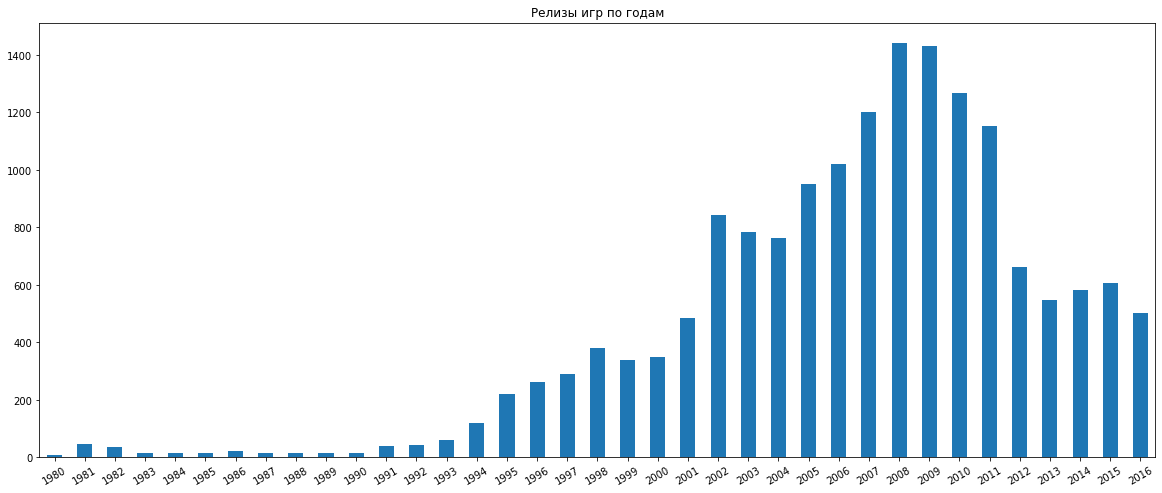

In [ ]:
    (df['year_of_release']
     .value_counts()
     .sort_index(ascending=True)
     .plot(kind='bar' ,figsize=(20,8))
     .set(title='Релизы игр по годам')
    );
    plt.xticks(rotation=30);

In [ ]:
df.pivot_table( index='year_of_release', values = 'name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


До 94го выпускалось менее 100 игр в год, с 95 - более 200. Данные за старые годы пригодятся нам только для анализа времени жизни и успешности тех или иных игровых платформ,но вряд ли помогут с предсказанием успешности игр на 2017 год - меняются платформы, популярные жанры игр.

Посмотрим,как соотносились платформы и года релизов игр

Text(0, 0.5, 'Платформа')

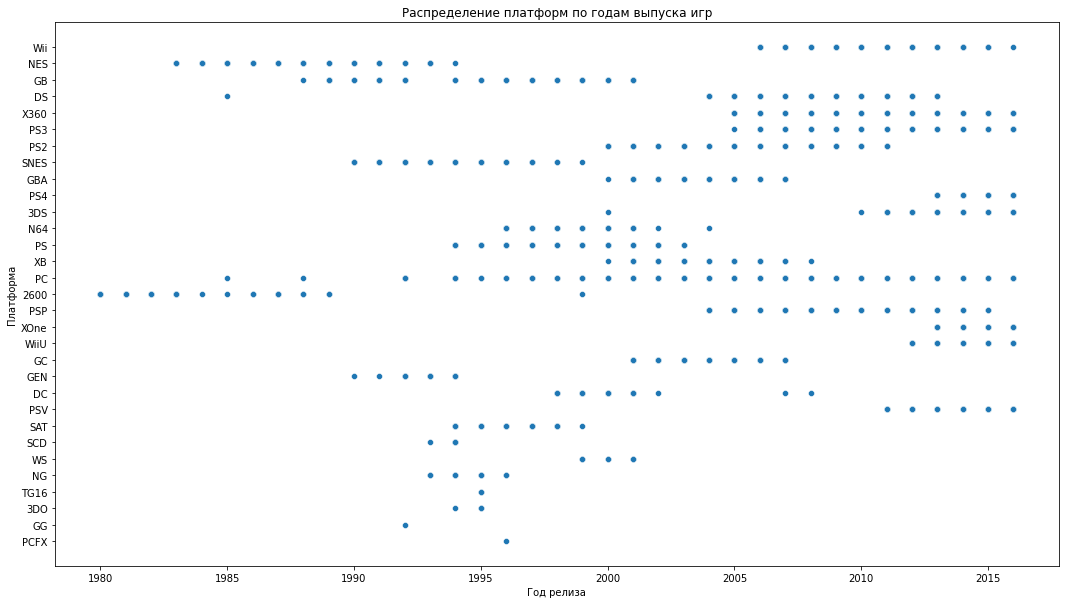

In [ ]:
plt.figure(figsize=(18, 10))
sns.scatterplot(data=df, x="year_of_release", y="platform");
plt.title('Распределение платформ по годам выпуска игр')
plt.xlabel('Год релиза')
plt.ylabel('Платформа')

Видно, как примерно к 1990 году платформа 2600 фактически перестала существовать, а на смену ей пришли  GEN и SNES. Некоторые платформы просуществовали лишб с 90х по 2000е. Интересно посмотреть, сколько же лет выходили игры на той или иной платформе - подсчитаем количество уникальных годов релиза игр для каждой платформы:.

In [ ]:
platforms_years = df.loc[:,['platform','year_of_release']].drop_duplicates().pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'count')
platforms_years

,year_of_release
platform,
2600,11
3DO,2
3DS,8
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


Платформы приходят и уходят и лишь PC живее всех живых. Посмотрим, как там дела со средней продолжительностью жизни:

<AxesSubplot:>

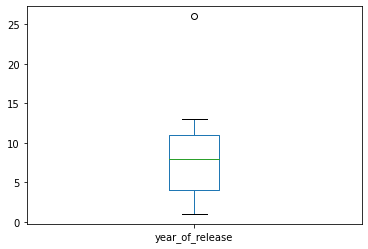

In [ ]:
platforms_years.plot(kind = 'box')

In [ ]:
print(platforms_years.mean())
print(platforms_years.median())

year_of_release    7.83871
dtype: float64
year_of_release    8.0
dtype: float64


PC явно выбивается, все же это не типовая  игровая платформа, которые сменяют друг друга, медианное же значение жизни игровой платформы - 8 лет.

Посмотрим, как менялись продажи по платформам. Для начала выясним, какие платформы самые успешные по результатм продаж на сей день.

In [ ]:
platforms_sales = (df.loc[:,['platform','year_of_release', 'sales']]
                   .pivot_table(index = 'platform', values = 'sales',
                                fill_value =  0, dropna = True,  aggfunc = 'sum')
                   .sort_values(by = 'sales', ascending = False)
                  )
top_platforms = list(platforms_sales.head(10).index)
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC']

Построим сводную таблицу, с одержащую суммарные продажи каждой из топ-10 платформ с разбивкой по годам.

In [ ]:
platforms_sales = (df.query('platform in @top_platforms').loc[:,['platform','year_of_release', 'sales']]
                   .pivot_table(index = 'platform', columns= 'year_of_release', values = 'sales',
                                fill_value =  0, dropna = True,  aggfunc = 'sum')
                  )
platforms_sales

year_of_release,1985,1988,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,
DS,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,147.23,145.36,119.56,85.35,26.33,11.67,1.54,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,61.53,74.16,56.67,77.91,34.53,5.46,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.04,0.03,3.03,12.87,4.22,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.89,10.39,4.38,2.85,9.28,12.46,17.05,26.15,35.16,23.45,13.01,13.28,8.52,5.25
PS,0.00,0.00,0.00,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PS2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39.17,166.43,208.36,193.45,212.76,161.23,107.03,76.10,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,21.44,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25
PSP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,56.28,47.30,36.76,37.78,35.04,17.82,7.95,3.38,0.24,0.12,0.00
Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,140.19,153.41,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18


Отобразим разбиение продаж по годам на общем графике

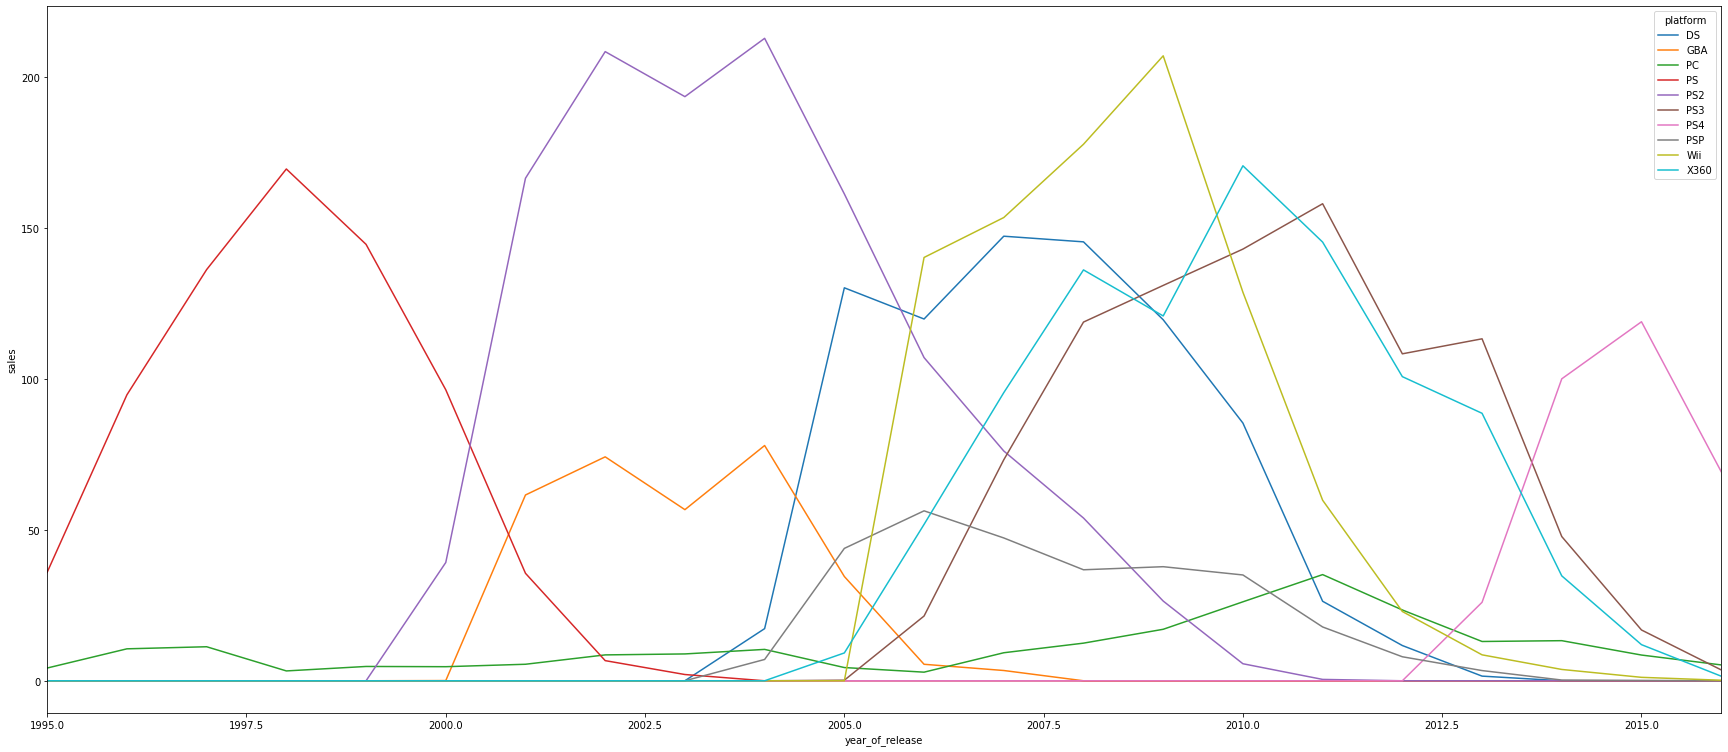

In [ ]:
platforms_sales = (df.query('platform in @top_platforms').loc[:,['platform','year_of_release', 'sales']]
                   .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sales',
                                fill_value =  0, dropna = True,  aggfunc = 'sum')
                  )

plt.rcParams["figure.figsize"] = (30,13)
ax = platforms_sales.T.plot(kind='line', xlim =(1995,2016))
xlab = ax.set_xlabel('year_of_release')
ylab = ax.set_ylabel('sales')

Видны расцветы и закаты по каждой из платформ. Посмотрим на плаформы с 2000 года попдробнее

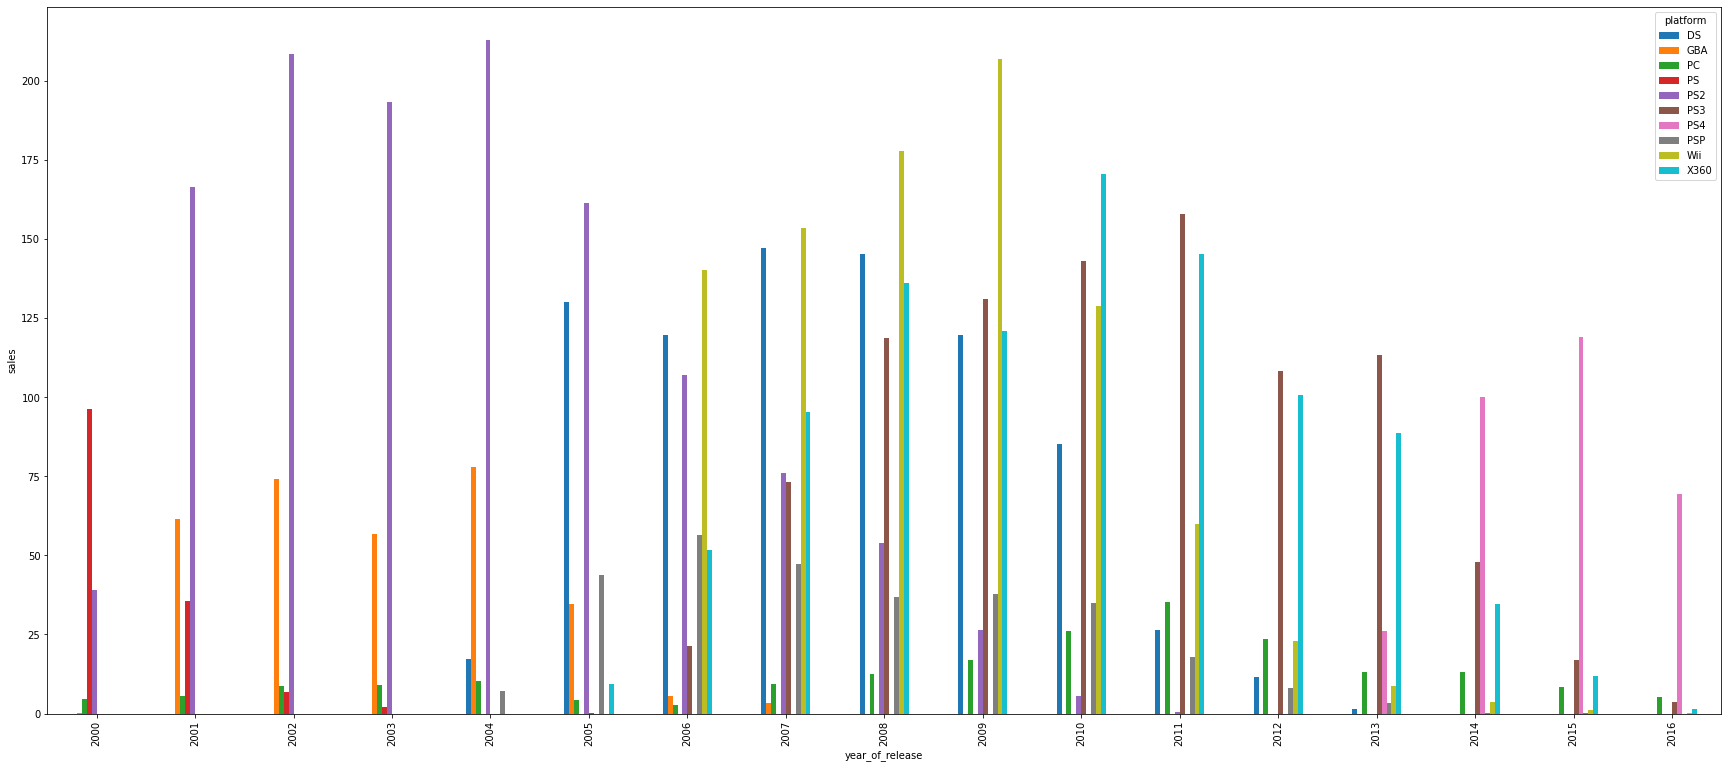

In [ ]:
platforms_sales = (df.query('platform in @top_platforms').loc[df['year_of_release']>=2000,['platform','year_of_release', 'sales']]
                   .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sales',
                                fill_value =  0, dropna = True,  aggfunc = 'sum')
                  )

plt.rcParams["figure.figsize"] = (30,13)
ax = platforms_sales.T.plot(kind='bar')
xlab = ax.set_xlabel('year_of_release')
ylab = ax.set_ylabel('sales')

2013 год выглядит  достаточно переломным - приходит конец платформе DS, продажи PSP каасрофически падают, появляеся PS4. Возьмем эти года, 2013 -2016 за актуальный период для оценки закономерностей, определяющих успешность игры.

In [ ]:
new_df = df[ df['year_of_release'] >2012]
new_df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,TBD,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,TBD,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,TBD,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0.0,0.0,TBD,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Посмотрим,как с прибыльностью у платформ за актуальный период:

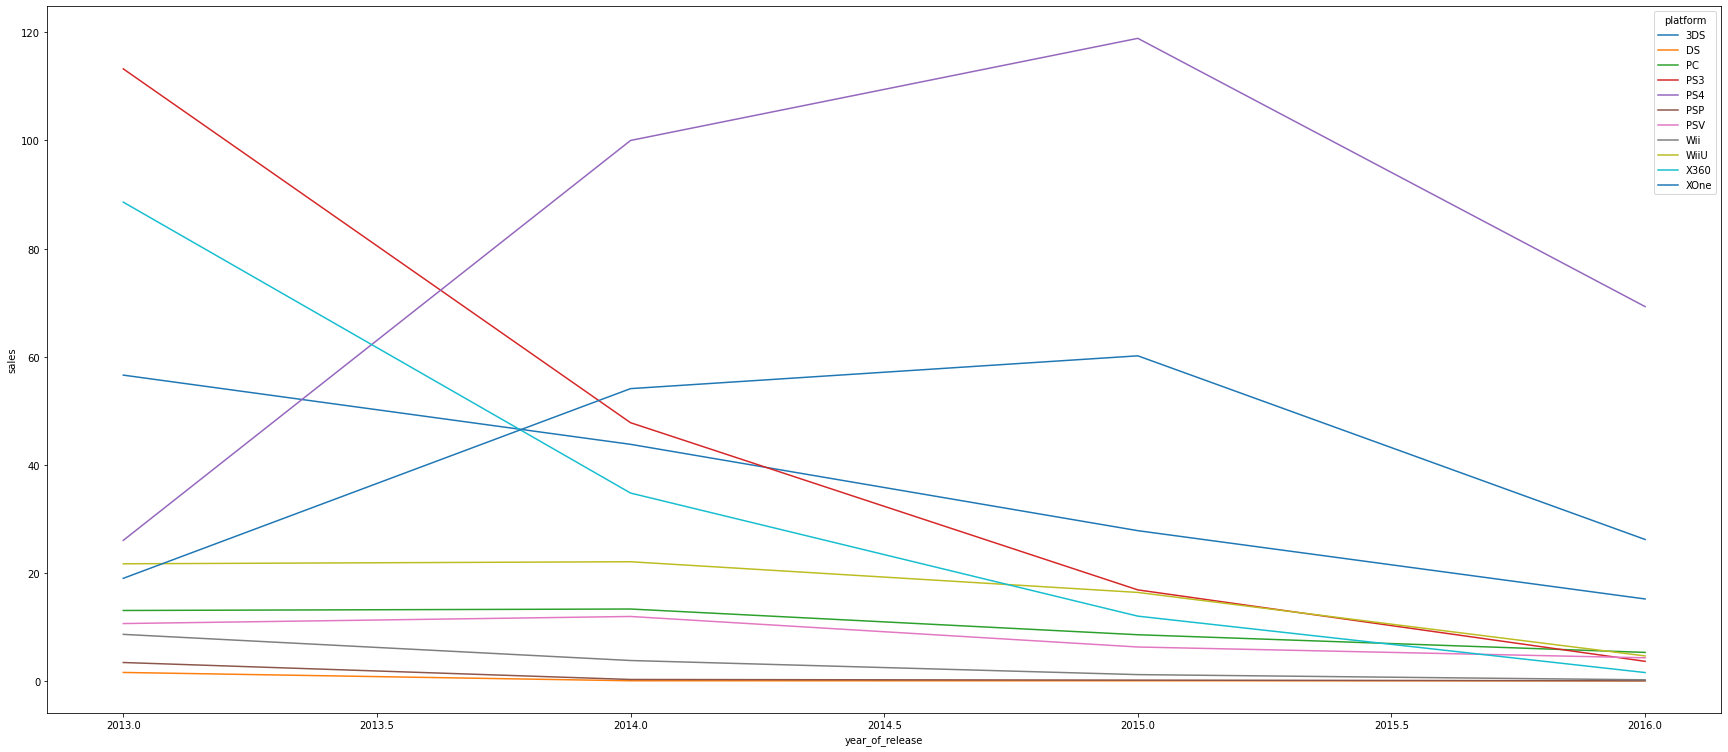

In [ ]:
platforms_sales = (new_df.loc[:,['platform','year_of_release', 'sales']]
                   .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sales',
                                fill_value =  0, dropna = True,  aggfunc = 'sum')
                  )

plt.rcParams["figure.figsize"] = (30,13)
ax = platforms_sales.T.plot(kind='line')
xlab = ax.set_xlabel('year_of_release')
ylab = ax.set_ylabel('sales')

In [ ]:
platforms_sales

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,13.01,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.38,0.24,0.12,0.00
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


Потенциально прибыльными являются платформы PS4, XOne. PS3 уступила позиции PS4, продажи 3DS так же неумолимо падают.

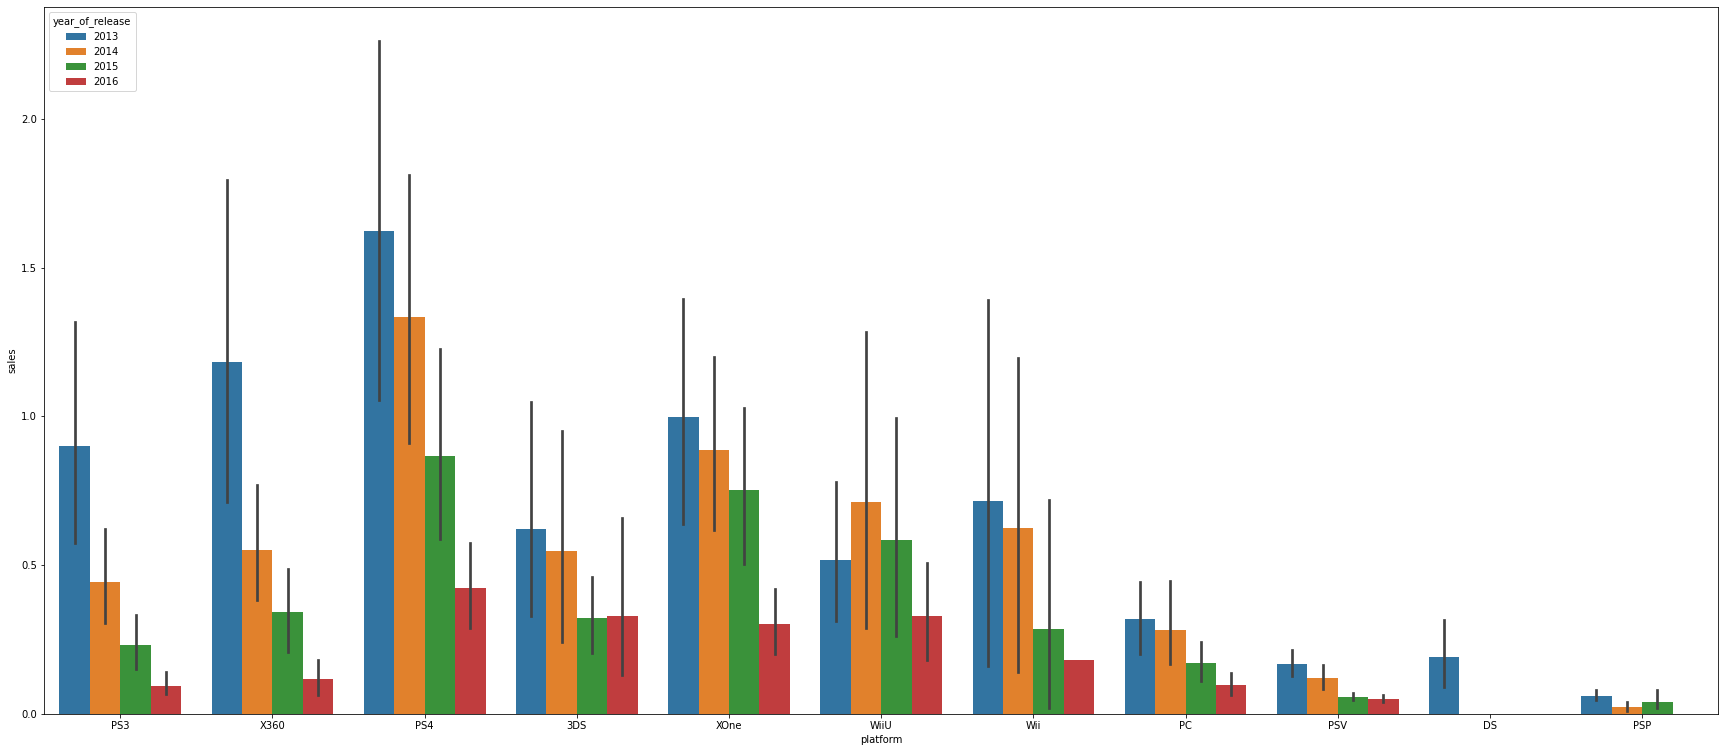

In [ ]:
my_games = new_df[(new_df['year_of_release']>2012)]
ax = sns.barplot(y='sales', x='platform', hue='year_of_release',\
                 data = my_games\
                )

Как ни крути, тенденция у всех платформ одна - общее снижение продаж с каждым годом.

Построим ящик с усами по глобальным продажам игр в разбивке по платформам

In [ ]:
#platforms_sales = (new_df.loc[:,['platform','year_of_release', 'sales']]
#                   .pivot_table(index = 'platform', columns = 'year_of_release', values = 'sales',
#                                fill_value =  0, dropna = True,  aggfunc = 'sum')
#                  )
#
#plt.rcParams["figure.figsize"] = (30,13)
#ax = platforms_sales.T.plot(kind='box')
#xlab = ax.set_xlabel('year_of_release')
#ylab = ax.set_ylabel('sales')

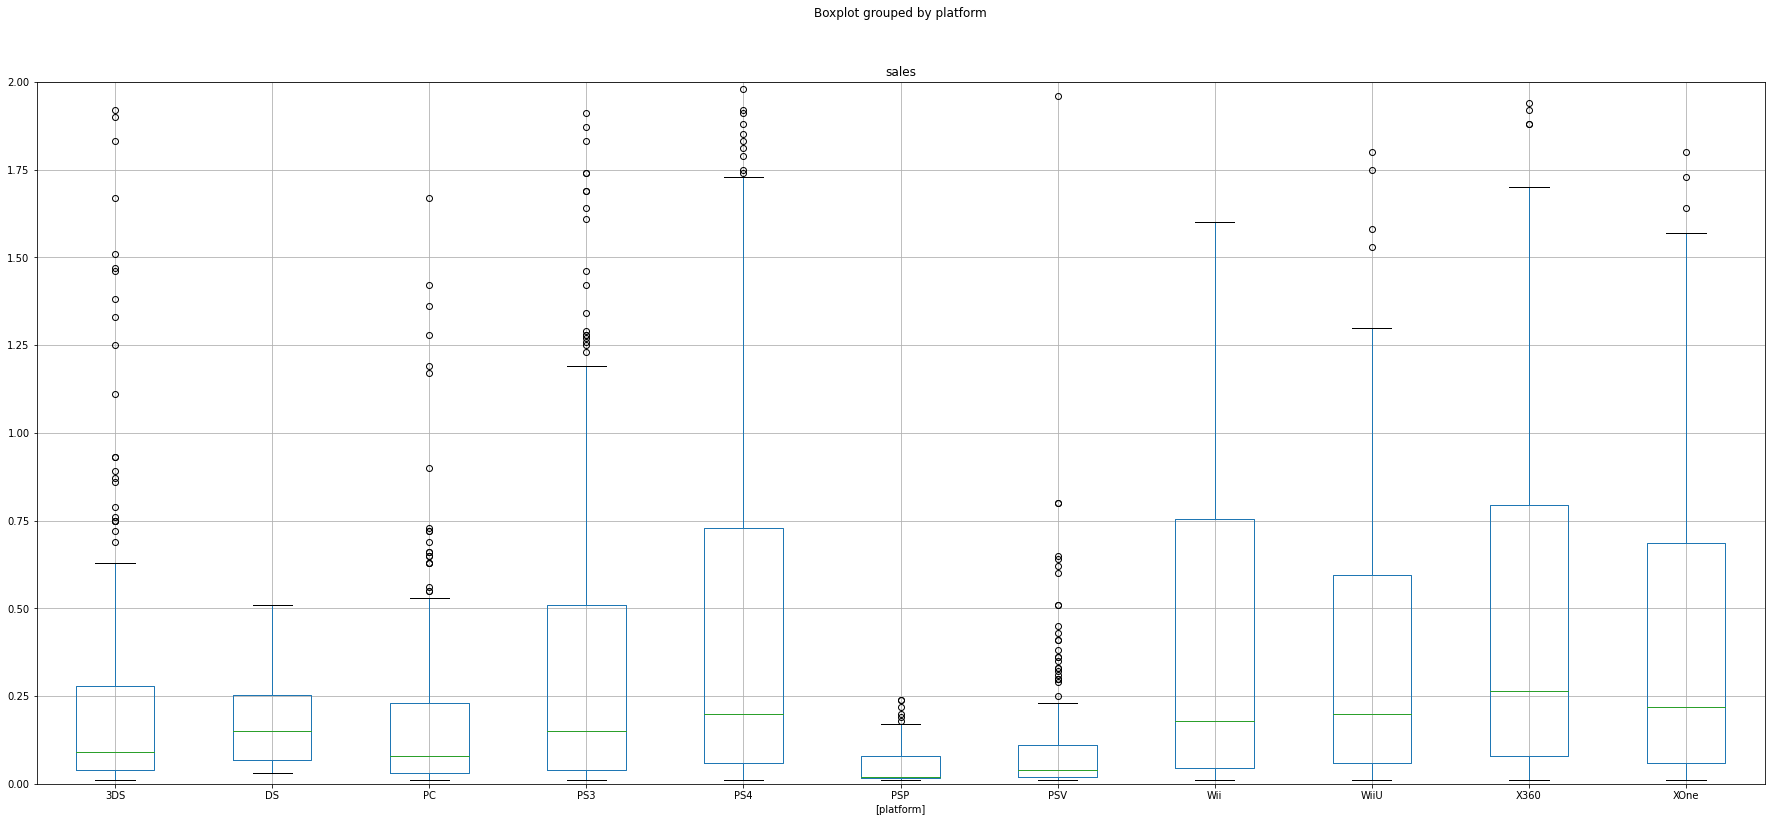

In [ ]:
plt.rcParams["figure.figsize"] = (30,13)
boxplot = new_df.boxplot(column=['sales'], by=['platform'])
plt.ylim([0,2]);

За рассматриваемый актуальный период большой разброс в объеме продаж испытали  PS4,Wii, X360. Максимальных продаж достигали PS4 и X360. В среднем за данный период наибольшее число продаж было у X360 и XOne, а наименьшее -у PSV, PSP.

Посмотрим, как влияют на продажи внутри самой на данный момент популярной платформы PS4 отзывы критиков.

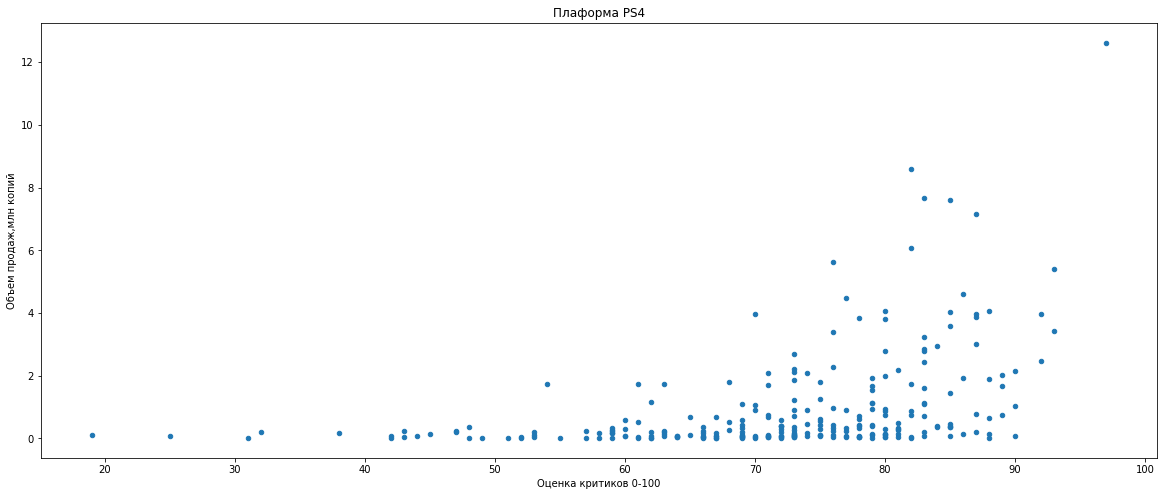

In [ ]:
df_ps4 = new_df.loc[(new_df['platform']=='PS4') & (new_df['critic_score']>0)]
df_ps4.plot(kind='scatter',x='critic_score',y='sales', figsize=(20,8),
            xlabel='Оценка критиков 0-100', ylabel='Объем продаж,млн копий', title = 'Плаформа PS4');


In [ ]:
df_ps4['sales'].corr(df_ps4['critic_score'])

0.406567902061781

На диаграмме рассеяния видно, что с оценкой критиков от 60 продажи начинают расти и достигают пика на отметке около 83, чо скорее связано не с тем, что наболее оцененные игры хуже покупают,а скорее с тем, что игр с насолько высокой оценкой мало.
Согласно коэффициенту корреляции связь здесь умеренная, прямая.

Посмотрим, как обстоит дело с оценкой пользоваелей

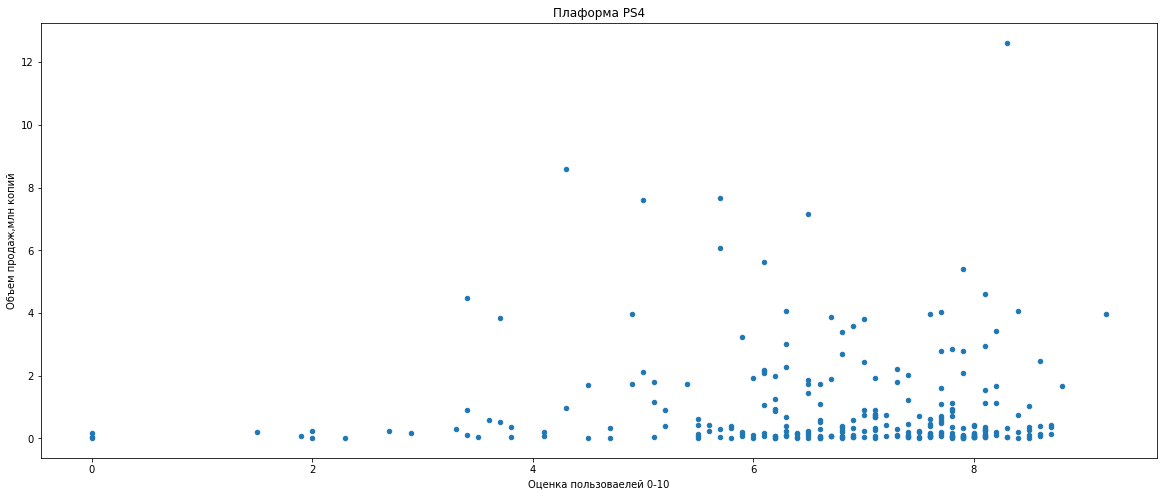

In [ ]:
df_ps4.plot(kind='scatter',x='user_score',y='sales', figsize=(20,8), xlabel='Оценка пользоваелей 0-10',
            ylabel='Объем продаж,млн копий', title = 'Плаформа PS4');


In [ ]:
df_ps4['sales'].corr(df_ps4['user_score'])

-0.0027302031571732836

Большая часть оценок от 5.5, здесь тоже виден подъем продаж в районе высоких оценок, однако есть высокие продажи с оценкаи 3.5-5.5.
Согласно коэфиициену корреляц саистическ значмая взамосвязь отсусвует.
Однако, оценка пользователей, при ее наличии, в диапазоне от 5.5 может дать дополнительные шансы на успешность продаж игры.

Проверим наличие такой же зависимости у нескольких других популярных платформ.

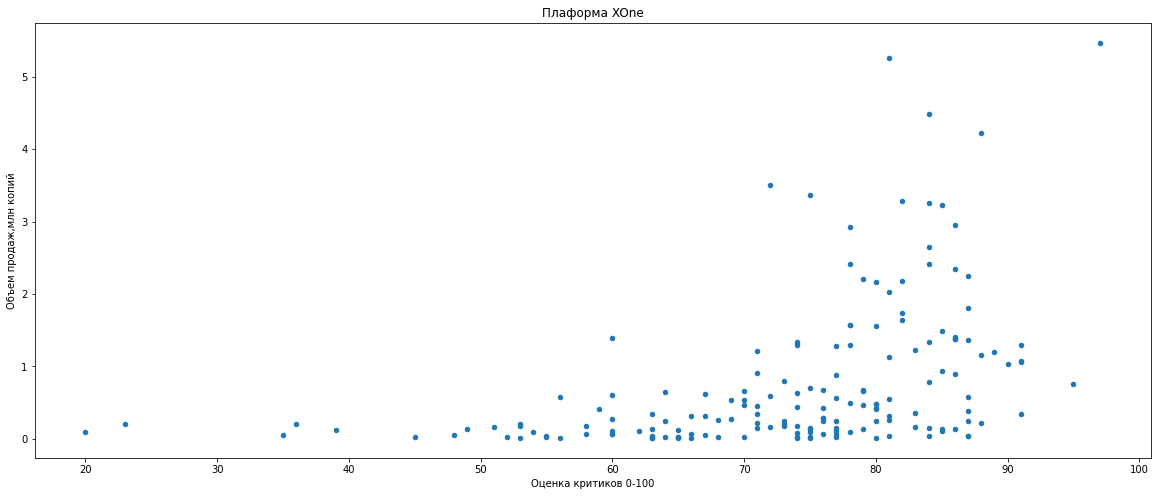

In [ ]:
df_xone = new_df.loc[(new_df['platform']=='XOne') & (new_df['critic_score']>0)]

df_xone.plot(kind='scatter',x='critic_score',y='sales', figsize=(20,8),
            xlabel='Оценка критиков 0-100', ylabel='Объем продаж,млн копий', title = 'Плаформа XOne');

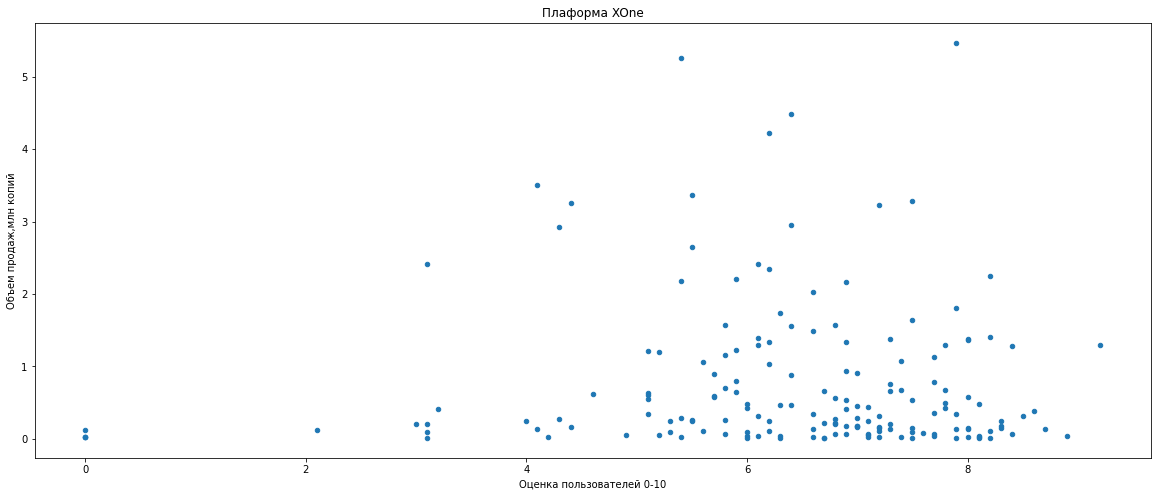

In [ ]:
df_xone.plot(kind='scatter',x='user_score',y='sales', figsize=(20,8),
            xlabel='Оценка пользователей 0-10', ylabel='Объем продаж,млн копий', title = 'Плаформа XOne');

In [ ]:
df_xone['sales'].corr(df_xone['critic_score'])

0.41699832800840175

In [ ]:
df_xone['sales'].corr(df_xone['user_score'])

-0.008912891419336013

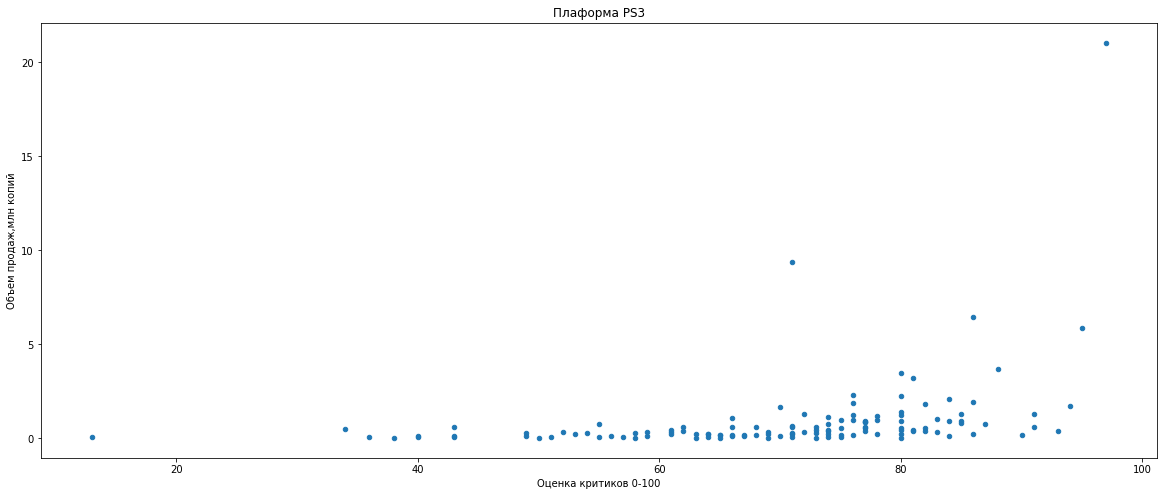

In [ ]:
df_ps3 = new_df.loc[(new_df['platform']=='PS3') & (new_df['critic_score']>0)]

df_ps3.plot(kind='scatter',x='critic_score',y='sales', figsize=(20,8),
            xlabel='Оценка критиков 0-100', ylabel='Объем продаж,млн копий', title = 'Плаформа PS3');

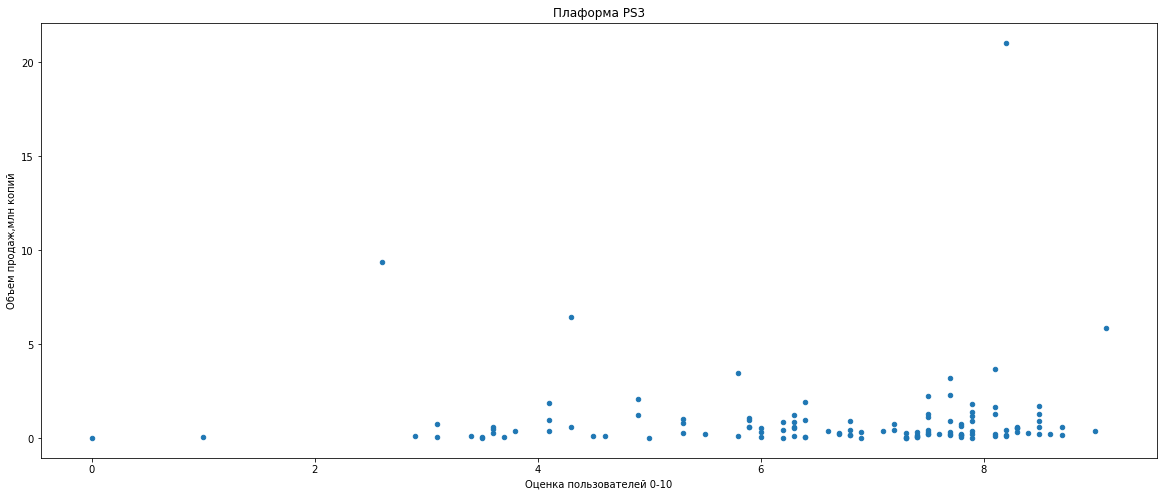

In [ ]:
df_ps3.plot(kind='scatter',x='user_score',y='sales', figsize=(20,8),
            xlabel='Оценка пользователей 0-10', ylabel='Объем продаж,млн копий', title = 'Плаформа PS3');

In [ ]:
df_ps3['sales'].corr(df_ps3['critic_score'])

0.3342853393371919

In [ ]:
df_ps3['sales'].corr(df_ps3['user_score'])

0.034284026381417955

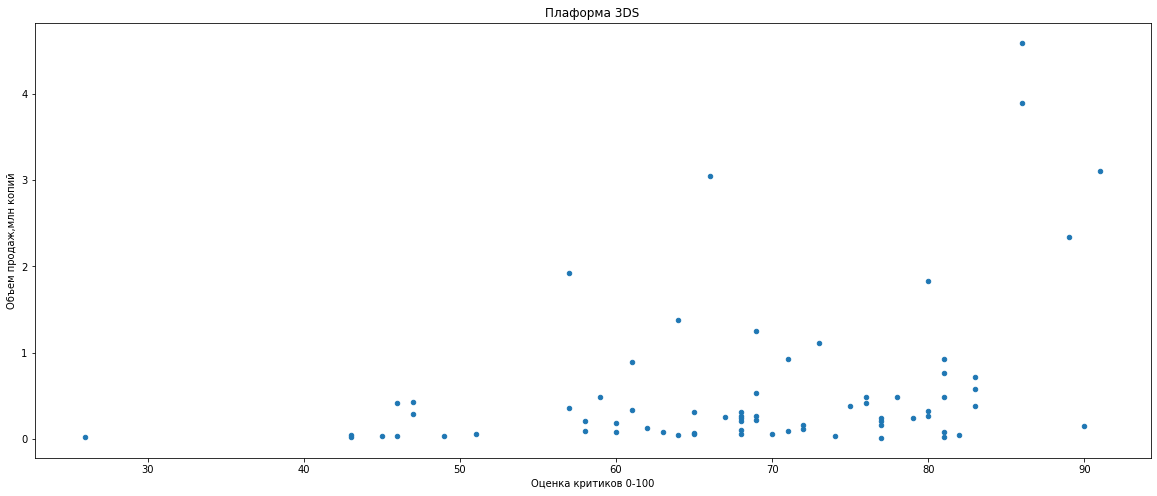

In [ ]:
df_3ds = new_df.loc[(new_df['platform']=='3DS') & (new_df['critic_score']>0)]

df_3ds.plot(kind='scatter',x='critic_score',y='sales', figsize=(20,8),
            xlabel='Оценка критиков 0-100', ylabel='Объем продаж,млн копий', title = 'Плаформа 3DS');

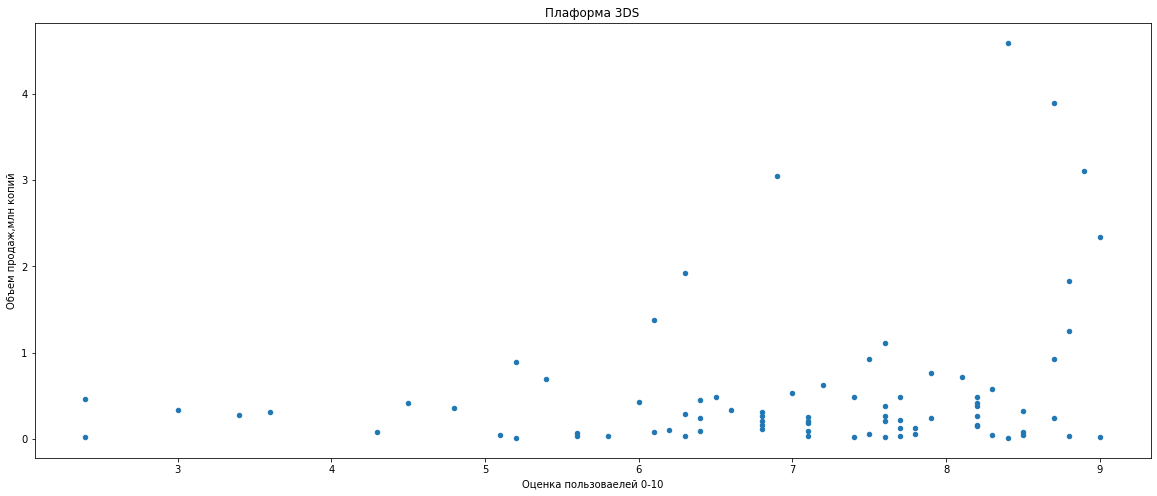

In [ ]:
df_3ds = new_df.loc[(new_df['platform']=='3DS') & (new_df['user_score']>0)]

df_3ds.plot(kind='scatter',x='user_score',y='sales', figsize=(20,8),
            xlabel='Оценка пользоваелей 0-10', ylabel='Объем продаж,млн копий', title = 'Плаформа 3DS');

In [ ]:
df_3ds['sales'].corr(df_3ds['critic_score'])

0.27919791456203097

In [ ]:
df_3ds['sales'].corr(df_3ds['user_score'])

0.24150411773563016

У всех практически идентичная сила корреляции, лишь у 3DS есть слабая связь оценок пользователей с продажами.

Оценим, как распределитлись игры по жанрам за актуальный период? с разбивкой по годам и без нее

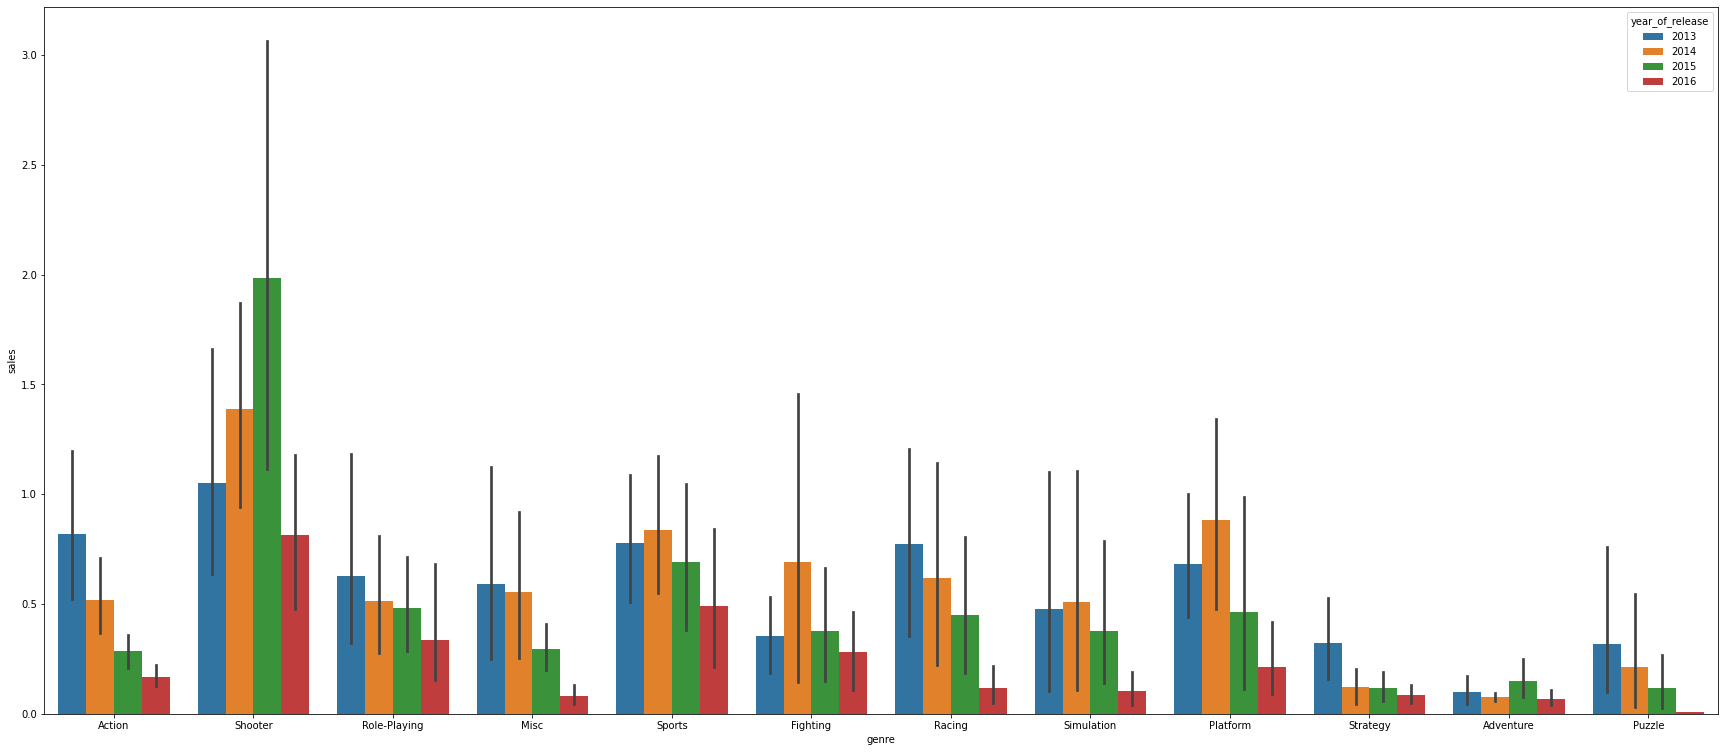

In [ ]:
my_genres = new_df[(new_df['year_of_release']>2012)]
ax = sns.barplot(y='sales', x='genre', hue='year_of_release',\
                 data = my_genres\
                )

Налицо падение продаж во всех жанрах, однако в заметен рост к 2015г у шутеров, платформенных игр в 2014, стабильное падение продаж к экшн игр и пазлов.

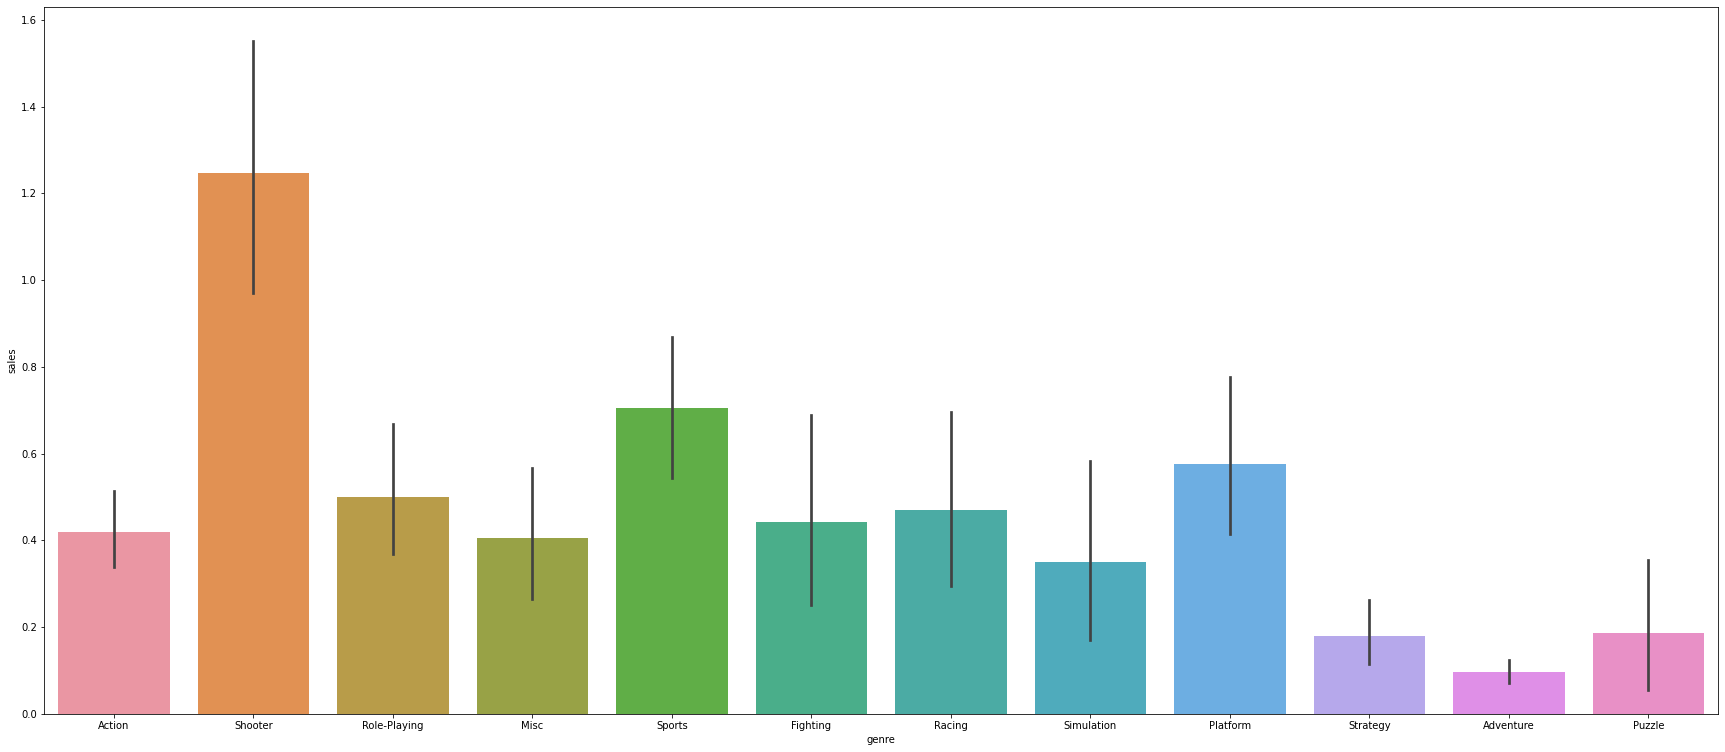

In [ ]:
my_genres = new_df[(new_df['year_of_release']>2012)]
ax = sns.barplot(y='sales', x='genre', \
                 data = my_genres\
                )

За актуальный период в среднем наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и платформенные. Наименьшие продажи у приключенческих игр.

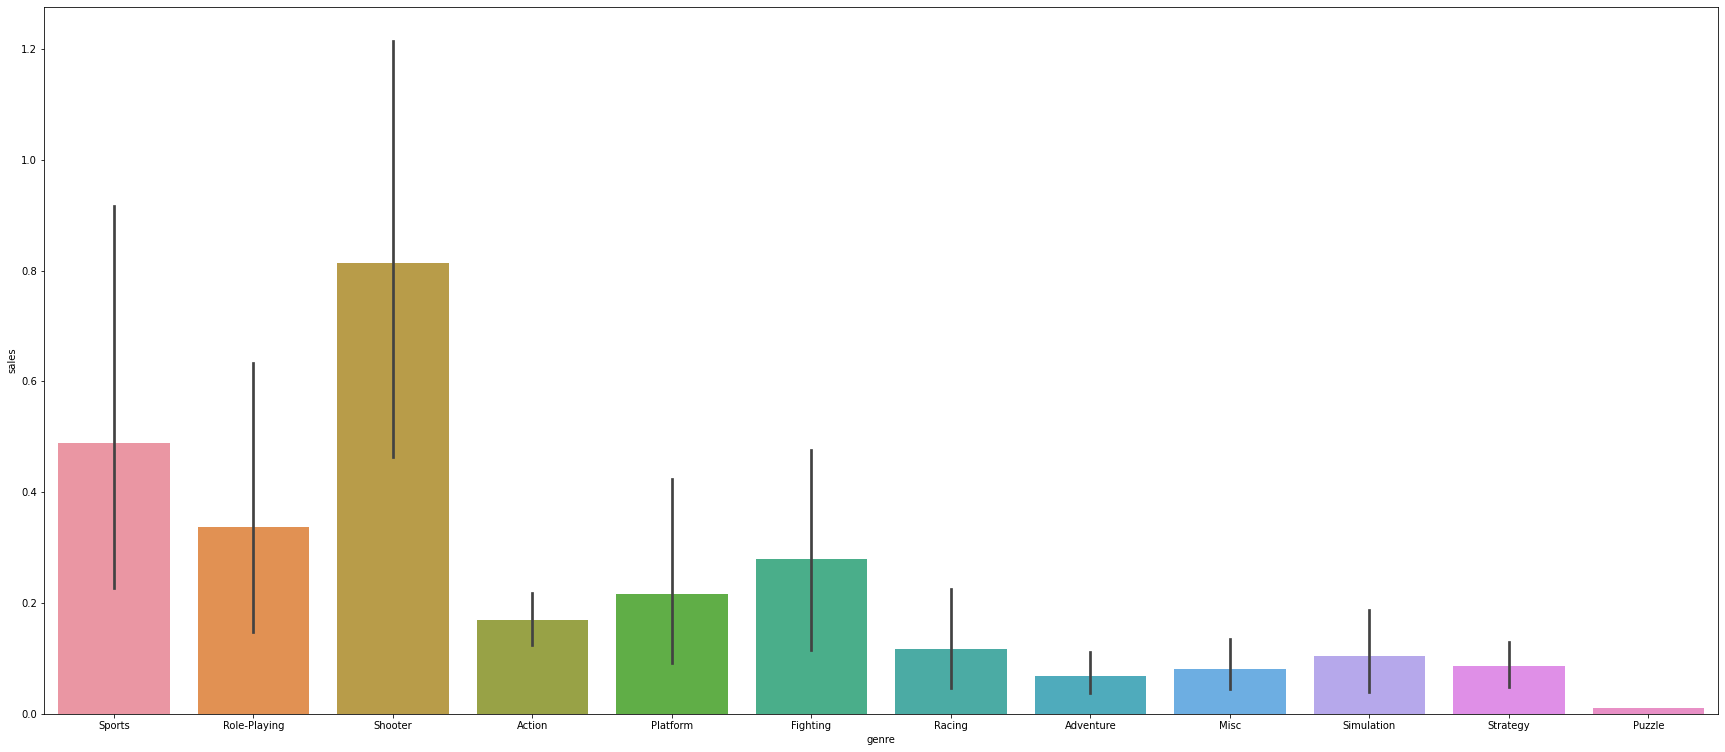

In [ ]:
my_genres = new_df[(new_df['year_of_release']>2015)]
ax = sns.barplot(y='sales', x='genre', \
                 data = my_genres\
                )

За 2016г наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и драки. Наименьшие продажи у пазлов.

**Вывод**

- До 94го выпускалось менее 100 игр в год, с 95 - более 200. Данные за старые годы пригодятся нам только для анализа времени жизни и успешности тех или иных игровых платформ,но вряд ли помогут с предсказанием успешности игр на 2017 год - меняются платформы, популярные жанры игр.
- К 1990 году платформа 2600 фактически перестала существовать, а на смену ей пришли GEN и SNES. Некоторые платформы просуществовали лишь с 90х по 2000е.
- Платформы приходят и уходят, средняя продолжительность платформы -8лет, и лишь PC живее всех живых, 26 лет и ей все нипочем.
- 2013 год выглядит достаточно переломным - приходит конец платформе DS, продажи PSP каасрофически падают, появляеся PS4. Поэтому эти года, 2013 -2016, принимаем за актуальный период для оценки закономерностей, определяющих успешность игры.
- Потенциально прибыльными за актуальный период являются платформы PS4, XOne. PS3 уступила позиции PS4, продажи 3DS так же неумолимо падают. Тенденция у всех платформ одна - общее снижение продаж с каждым годом.
- За рассматриваемый актуальный период большой разброс в объеме продаж испытали PS3, PS4, X360, Xone и 3DS. Максимальных продаж достигали PS4 и PS3. В среднем за данный период наибольшее число продаж было у PS4, Xone и 3DS, а наименьшее -у DS, PSP.
- Связь между оценкой критиков и продажами прямая, умеренная (силой около 0.4)
- Статистически значимая связь между оценкой пользователей и продажами отсутствует, зак исключением платформы 3DSБ популярной в основном в Японии.
- Налицо падение продаж во всех жанрах, однако в заметен рост к 2015г у шутеров, платформенных игр в 2014, стабильное падение продаж к экшн игр и пазлов.
- За актуальный период в среднем наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и платформенные. Наименьшие продажи у приключенческих игр.
- За 2016г наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и драки. Наименьшие продажи у пазлов.

## Составим портрет пользователя каждого региона ##
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Посмотрим на топ-5 платформ в каждом из 3 регионов продаж. Рассмотри самые свежие данные, за 2016 год.

In [ ]:
region_sales = (df.loc[df['year_of_release']==2016,['platform','na_sales','eu_sales','jp_sales','other_sales','sales']]
                   .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','sales'], 'platform', aggfunc = 'sum')
                   .sort_values(by = 'eu_sales', ascending = False)
                  )
region_sales

,eu_sales,jp_sales,na_sales,other_sales,sales
platform,,,,,
PS4,31.78,5.74,21.49,10.24,69.25
XOne,9.63,0.01,14.27,2.24,26.15
PC,3.53,0.00,1.36,0.36,5.25
3DS,2.33,8.03,4.14,0.64,15.14
WiiU,1.48,0.67,2.10,0.35,4.60
PS3,1.26,1.30,0.67,0.37,3.60
X360,0.71,0.00,0.69,0.12,1.52
PSV,0.39,3.56,0.15,0.15,4.25
Wii,0.11,0.00,0.06,0.01,0.18


Топ-5 платформ в Европе
 platform
PS4     31.78
XOne     9.63
PC       3.53
3DS      2.33
WiiU     1.48
Name: eu_sales, dtype: float64


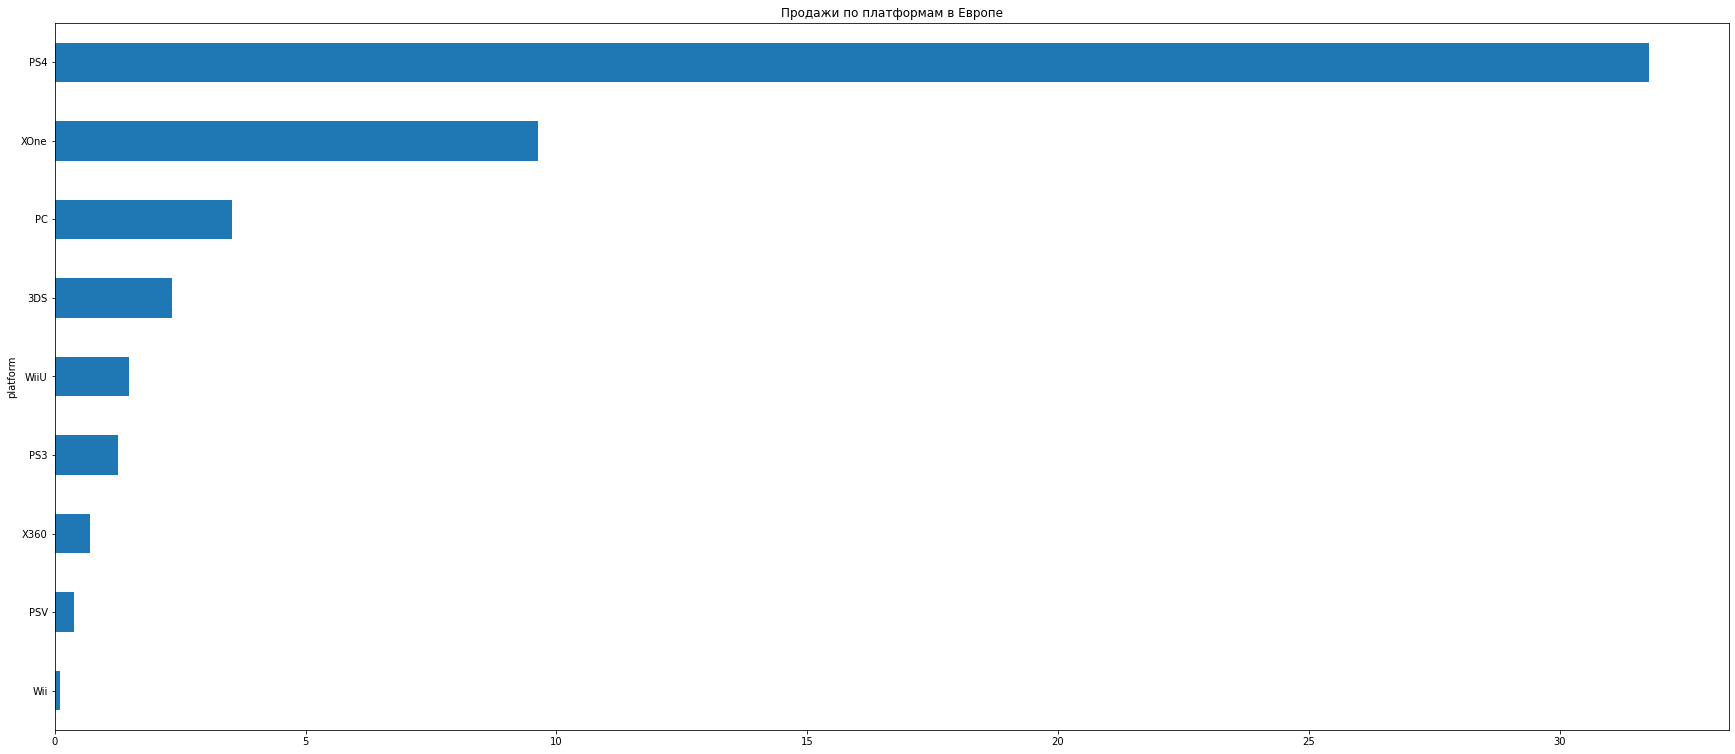

In [ ]:
print('Топ-5 платформ в Европе\n', region_sales['eu_sales'].sort_values(ascending = False).head(5))
region_sales['eu_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по платформам в Европе');

Топ-5 платформ в Северной Америке 
 platform
PS4     21.49
XOne    14.27
3DS      4.14
WiiU     2.10
PC       1.36
Name: na_sales, dtype: float64


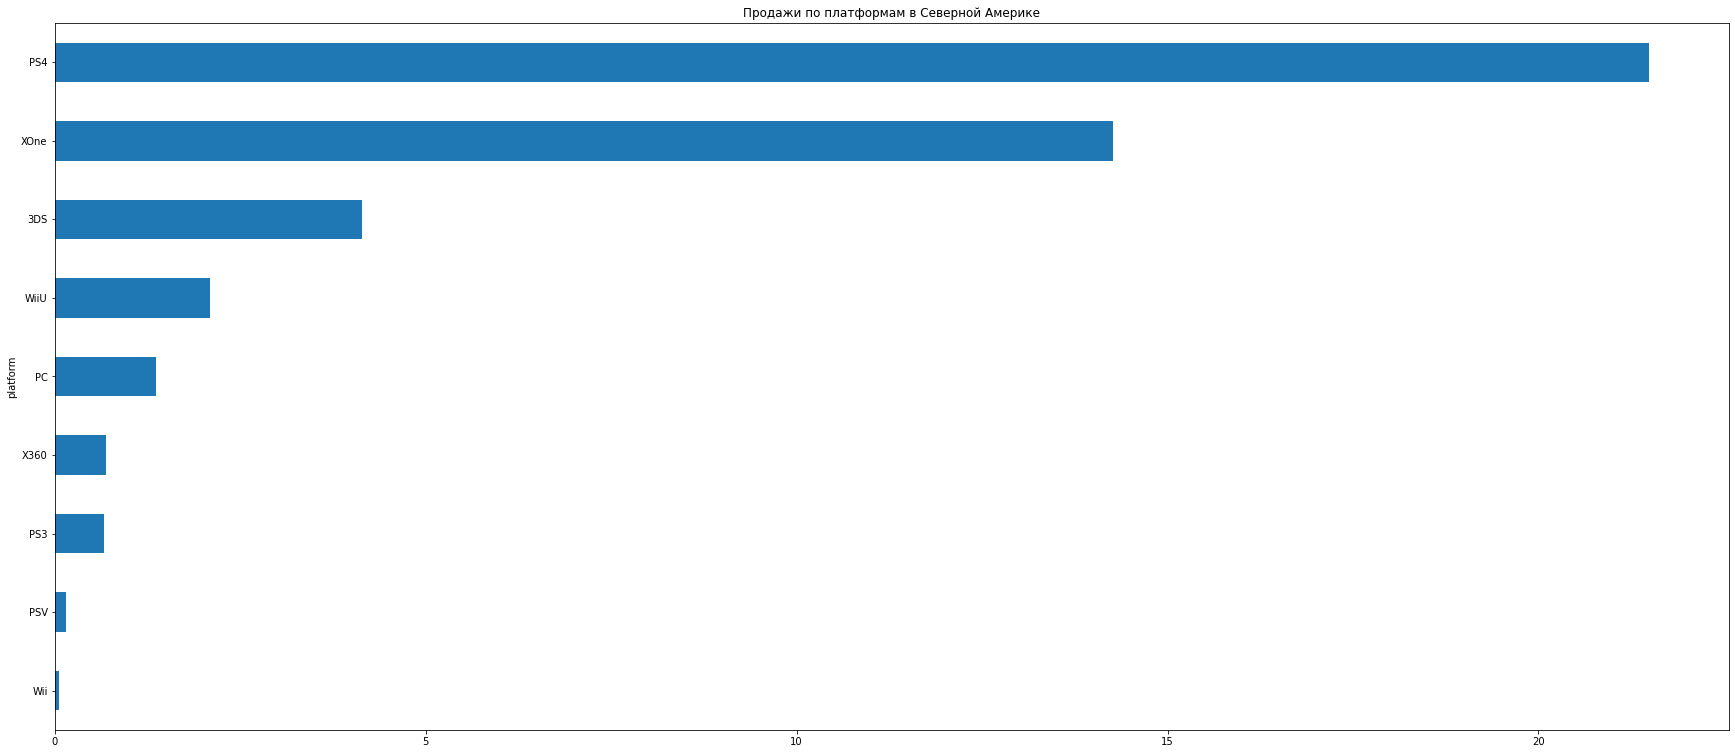

In [ ]:
print('Топ-5 платформ в Северной Америке \n', region_sales['na_sales'].sort_values(ascending = False).head(5))
region_sales['na_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по платформам в Северной Америке');

Топ-5 платформ в Японии
 platform
3DS     8.03
PS4     5.74
PSV     3.56
PS3     1.30
WiiU    0.67
Name: jp_sales, dtype: float64


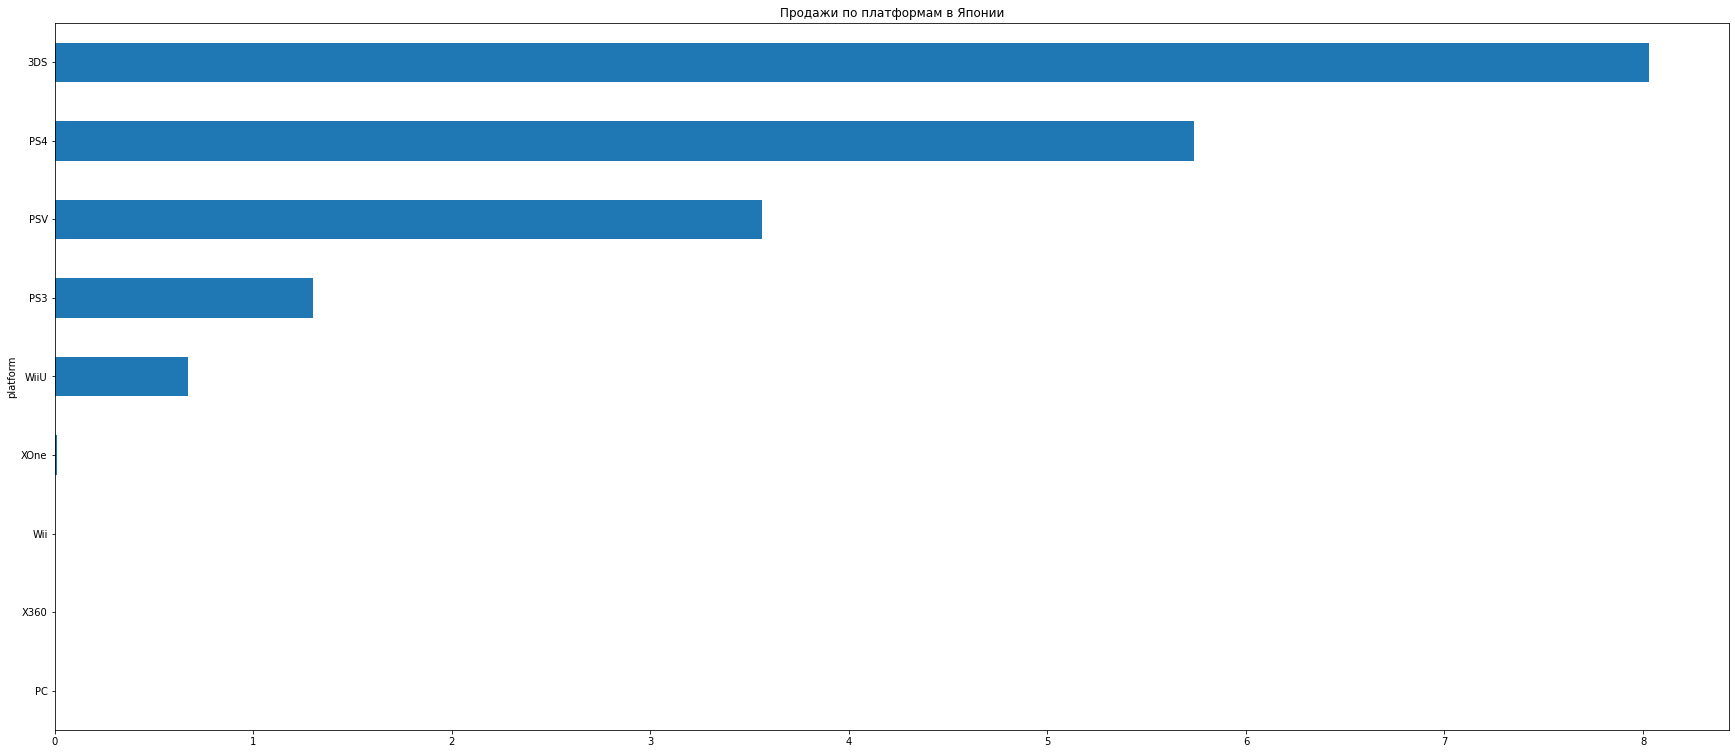

In [ ]:
print('Топ-5 платформ в Японии\n', region_sales['jp_sales'].sort_values(ascending = False).head(5))
region_sales['jp_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по платформам в Японии');

Топ-5 платформ в мире
 platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
Name: sales, dtype: float64


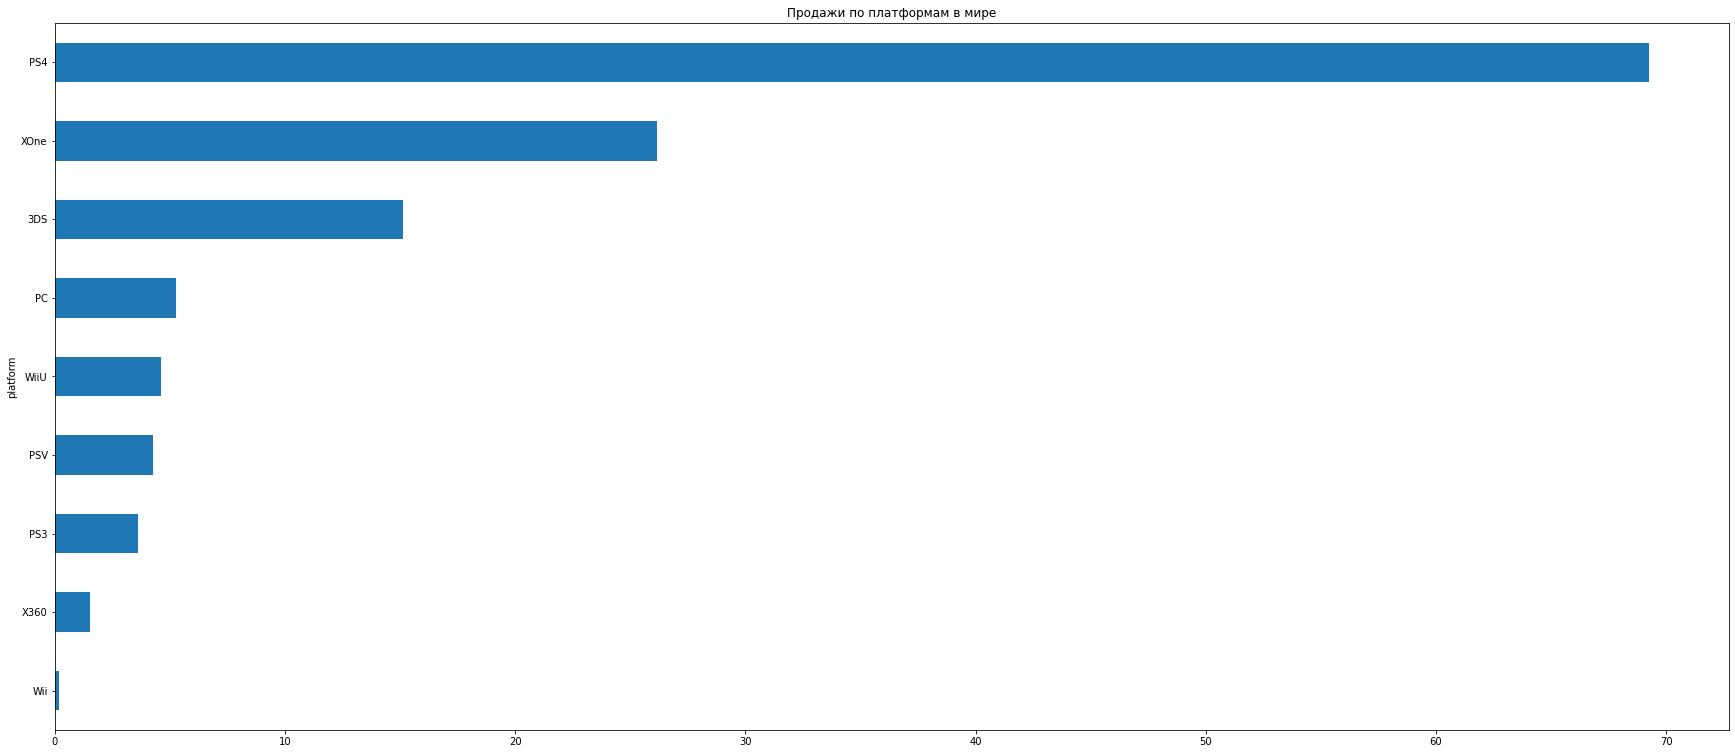

In [ ]:
print('Топ-5 платформ в мире\n', region_sales['sales'].sort_values(ascending = False).head(5))
region_sales['sales'].sort_values().plot(kind = 'barh', title = 'Продажи по платформам в мире');

- Топ-5 платформ для Европы: PS4, XOne, PC, 3DS, WiiU
- Топ-5 платформ для Северной Америки:PS4, XOne,3DS, WiiU, PC
- Топ-5 платформ для Японии: 3DS, PS4, PSV,PS3, WiiU
- Топ-5 платформ в мире: PS4, XOne, 3DS, PC, WiiU
    
Европа и Северная Америка по составу топовых платформ совпадают с мировым, отличается порядок следования по убыванию популярности.
Япония же отличается: в их топ PC даже не вошла, зато есть PSV и PS3.

Посмотрим,как распределны проценты продаж этих популярных платформ по регионам.

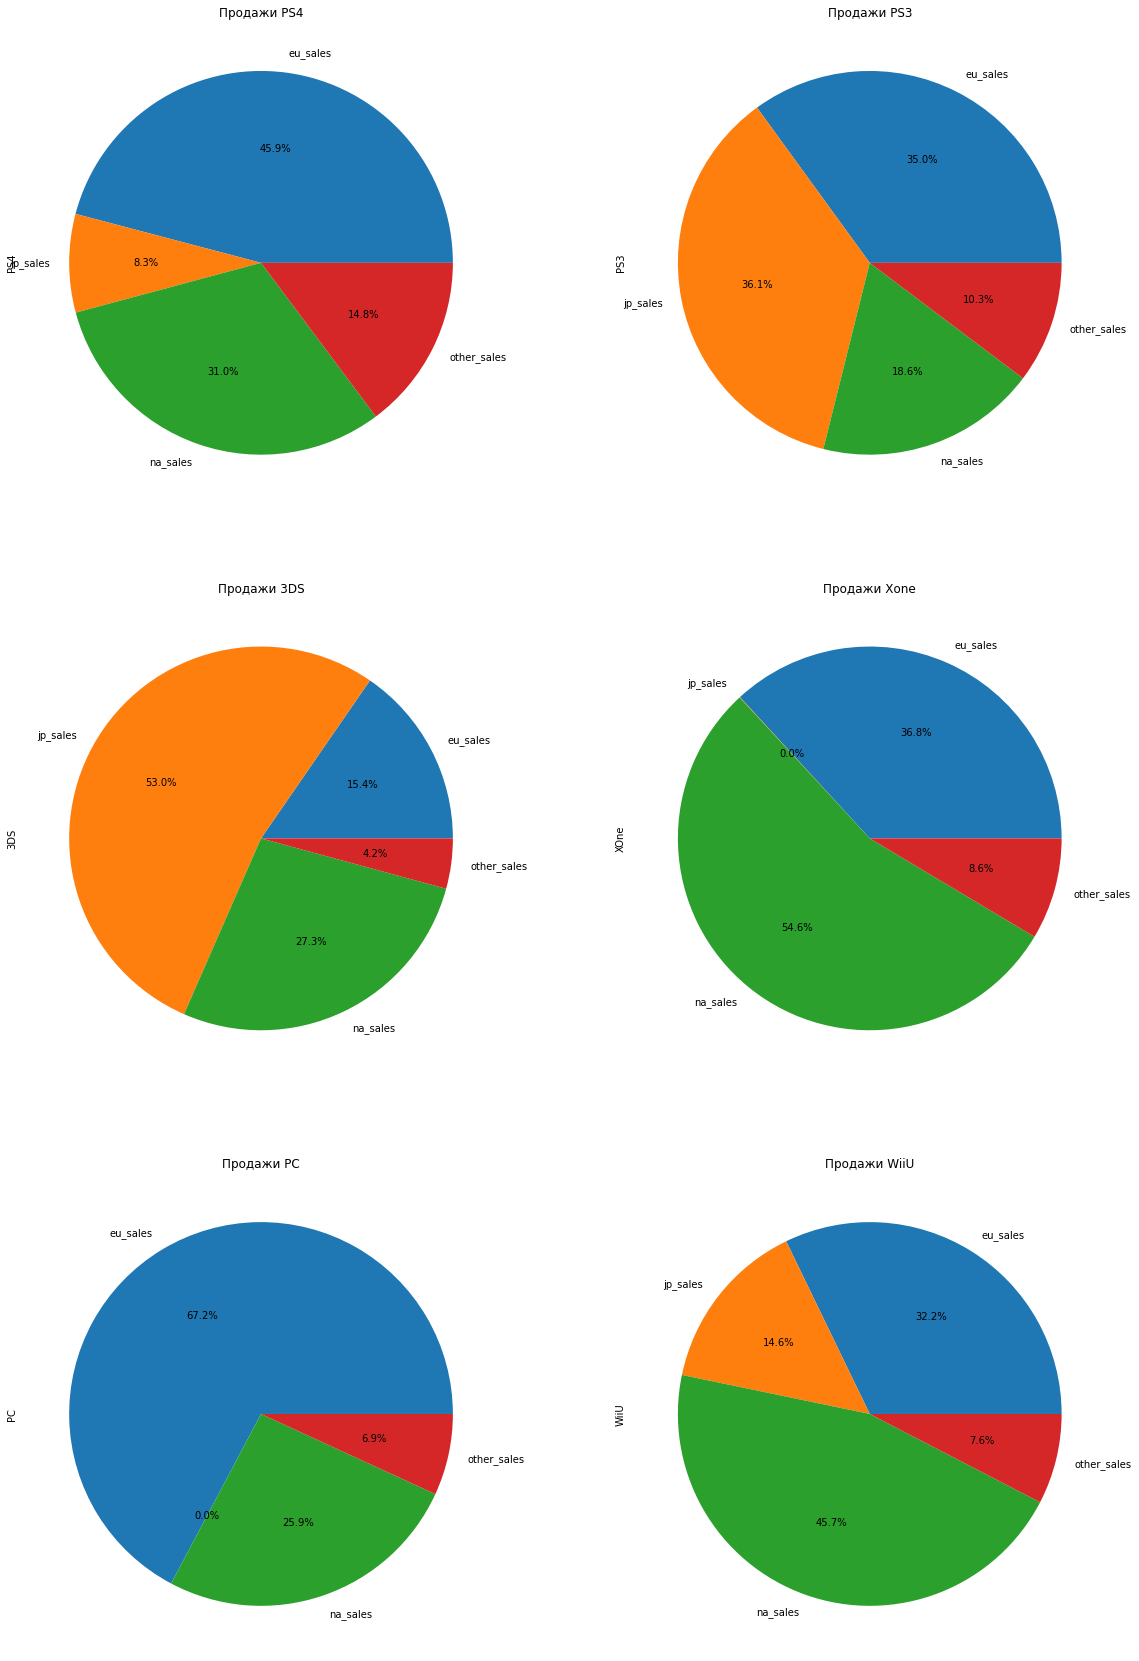

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
region_sales.loc['PS4',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[0, 0], title = 'Продажи PS4', autopct = '%1.1f%%');
region_sales.loc['PS3',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[0, 1], title = 'Продажи PS3', autopct = '%1.1f%%');
region_sales.loc['3DS',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[1, 0], title = 'Продажи 3DS', autopct = '%1.1f%%');
region_sales.loc['XOne',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[1, 1], title = 'Продажи Xone', autopct = '%1.1f%%');
region_sales.loc['PC',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[2, 0], title = 'Продажи PC', autopct = '%1.1f%%');
region_sales.loc['WiiU',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[2, 1], title = 'Продажи WiiU', autopct = '%1.1f%%');

- Почти половина рынка PS4 (46%) -Европа, а 31%  -Северная Америка. В Японии всего 8%.
- Практически с одинаковой долей, около трети, делят рынок PS3 Япония (36%) и Европа (35%). В Северной Америке 19%.
- Больше половины рынка (53%) 3DS приходится на Японию и лишь около трети (27%) - на Северную Америку. В Европе всего 15%.
- Половина рынка(55%) Xone  приходится на Северную Америку, в Европе чуть больше трети(37%). В Японии она не входит в топ-5.
- Больше половины рынка (67.2%) PC приходится на Европу, чуть меньше трети (26%) -на Северную Америку. В Японии она не входит в топ-5.
- Почти половину рынка (46%) WiiU занимает Северная Америка, треть (32%) - Европа. В японии 15%.

Посмотрим на топ-5 жанров в каждом из 3 регионов продаж. Рассмотри самые свежие данные, за 2016 год.

In [ ]:
region_sales = (df.loc[df['year_of_release']==2016,['genre','na_sales','eu_sales','jp_sales','other_sales','sales']]
                   .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','sales'], 'genre', aggfunc = 'sum')
                   .sort_values(by = 'eu_sales', ascending = False)
                  )
region_sales

,eu_sales,jp_sales,na_sales,other_sales,sales
genre,,,,,
Shooter,15.90,1.06,16.24,5.02,38.22
Sports,12.01,0.92,7.54,3.02,23.49
Action,10.68,7.07,9.29,3.07,30.11
Role-Playing,4.28,6.61,5.89,1.40,18.18
Racing,1.77,0.01,0.73,0.28,2.79
Platform,1.39,0.11,1.29,0.44,3.23
Fighting,1.34,0.75,1.84,0.54,4.47
Adventure,1.32,1.18,0.95,0.37,3.82
Simulation,1.27,0.33,0.16,0.13,1.89


Топ-5 жанров в Европе
 genre
Shooter         15.90
Sports          12.01
Action          10.68
Role-Playing     4.28
Racing           1.77
Name: eu_sales, dtype: float64


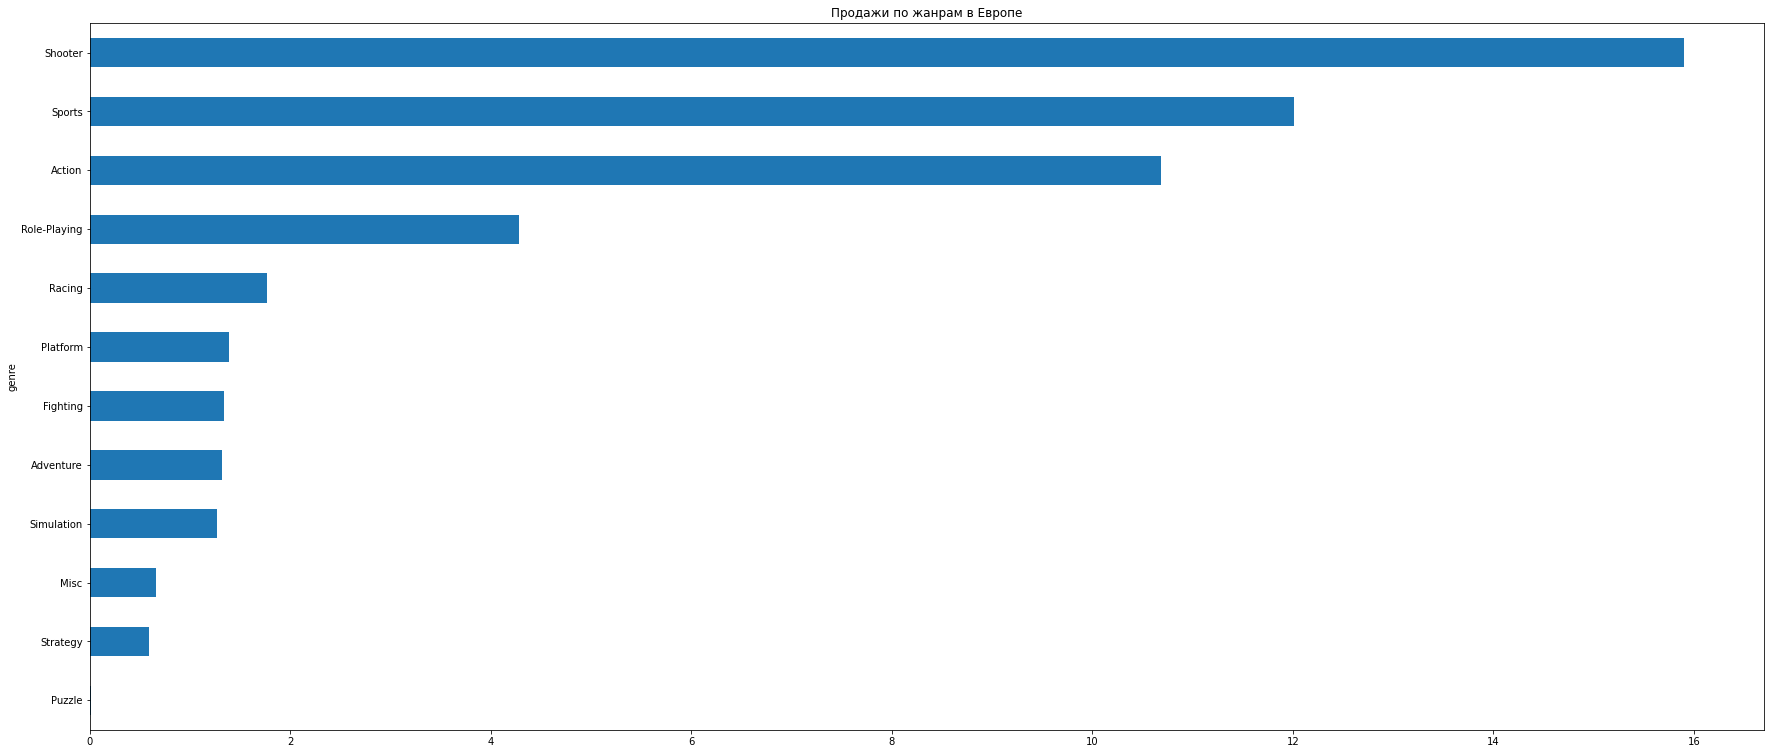

In [ ]:
print('Топ-5 жанров в Европе\n', region_sales['eu_sales'].sort_values(ascending = False).head(5))
region_sales['eu_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по жанрам в Европе');

Топ-5 жанров в Северной Америке 
 genre
Shooter         16.24
Action           9.29
Sports           7.54
Role-Playing     5.89
Fighting         1.84
Name: na_sales, dtype: float64


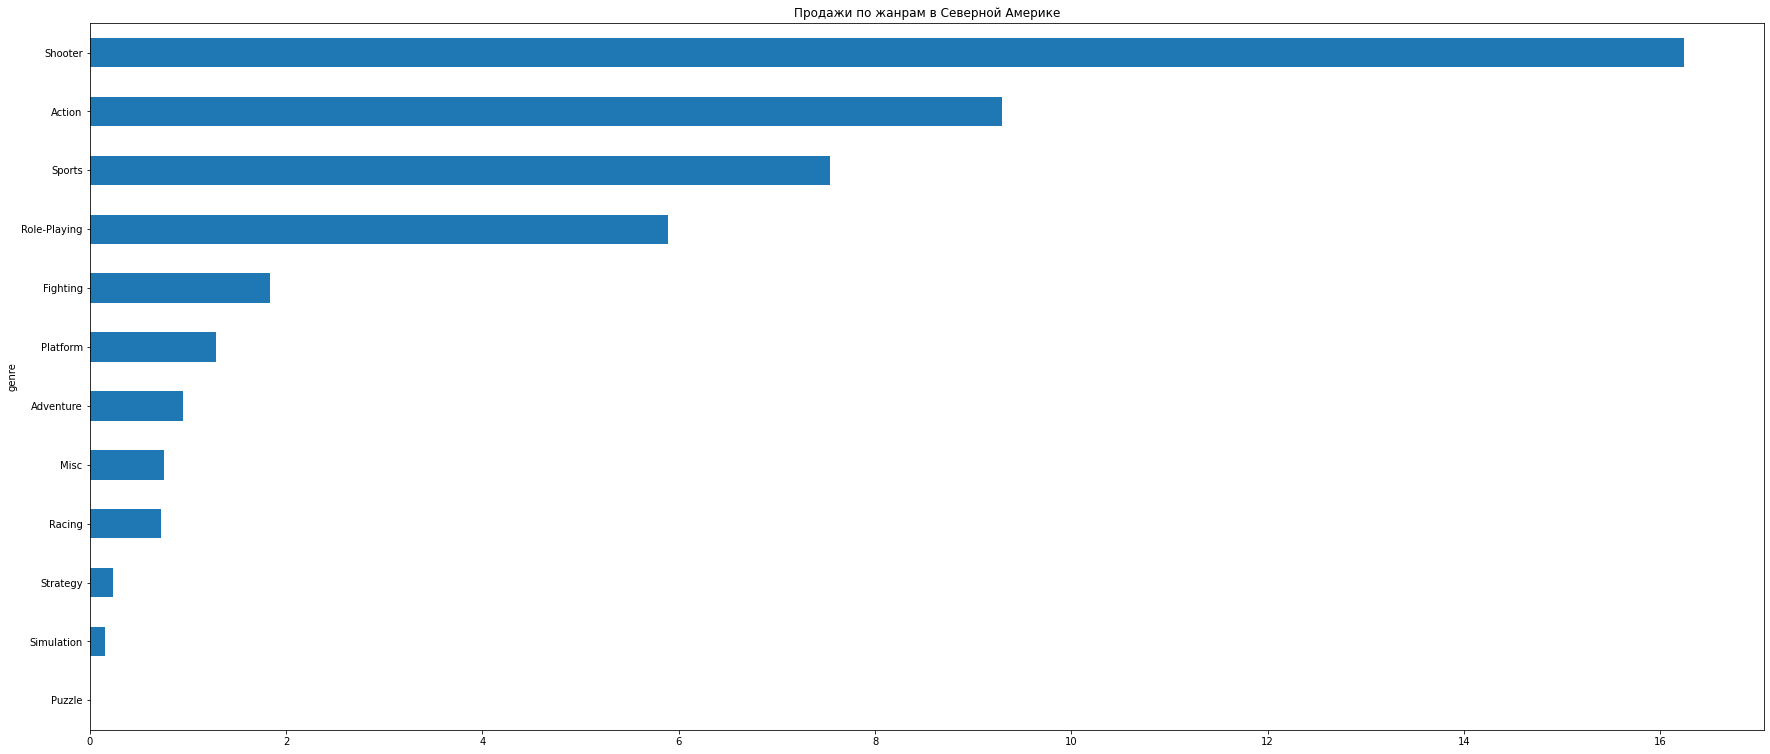

In [ ]:
print('Топ-5 жанров в Северной Америке \n', region_sales['na_sales'].sort_values(ascending = False).head(5))
region_sales['na_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по жанрам в Северной Америке');

Топ-5 жанров в Японии
 genre
Action          7.07
Role-Playing    6.61
Adventure       1.18
Shooter         1.06
Misc            1.04
Name: jp_sales, dtype: float64


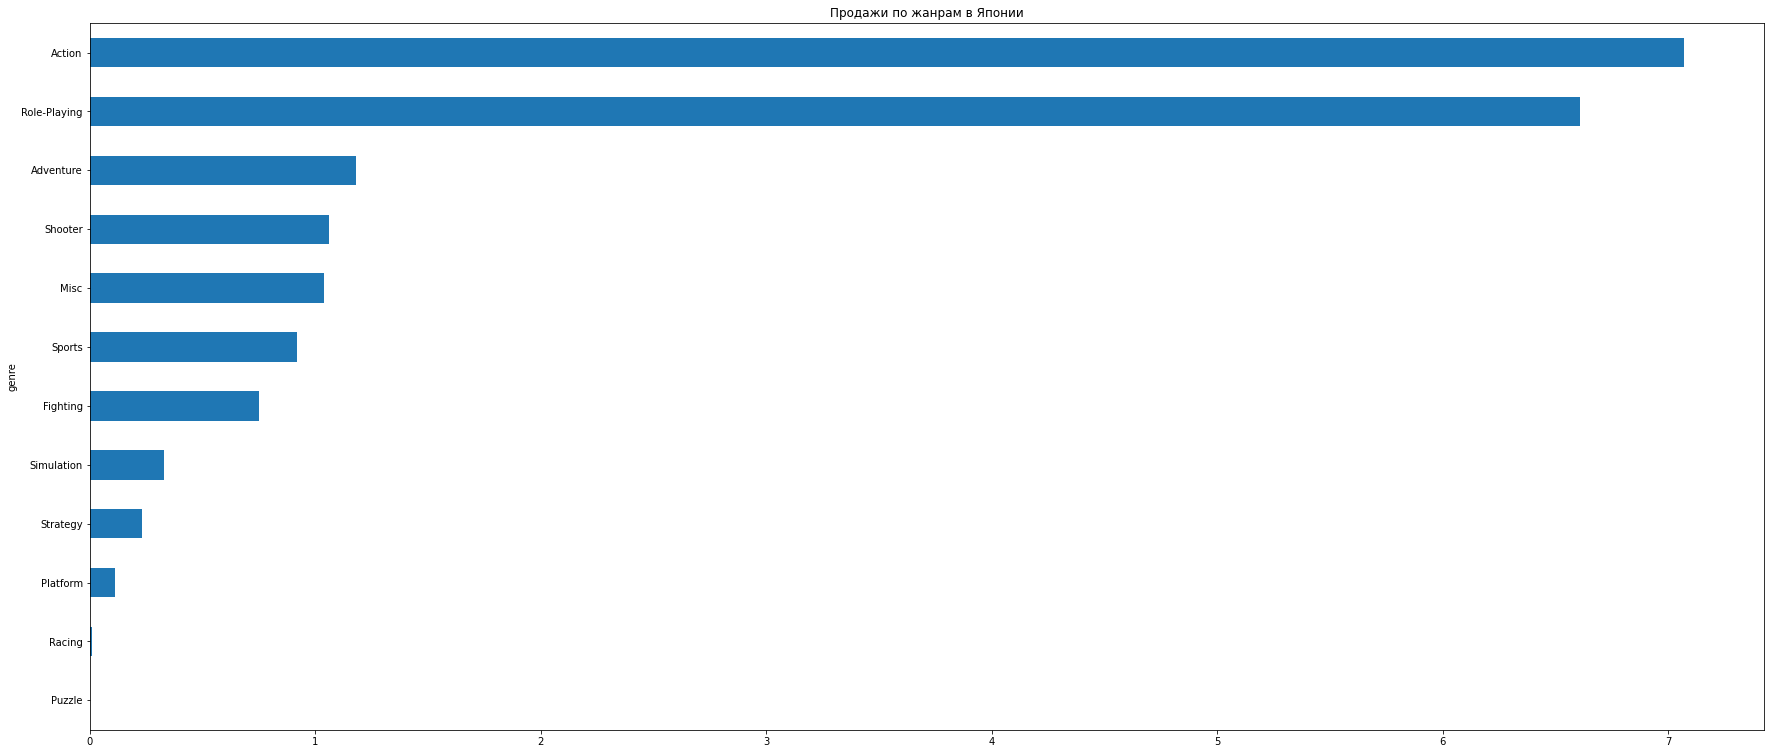

In [ ]:
print('Топ-5 жанров в Японии\n', region_sales['jp_sales'].sort_values(ascending = False).head(5))
region_sales['jp_sales'].sort_values().plot(kind = 'barh', title = 'Продажи по жанрам в Японии');

Топ-5 жанров в мире
 genre
Shooter         38.22
Action          30.11
Sports          23.49
Role-Playing    18.18
Fighting         4.47
Name: sales, dtype: float64


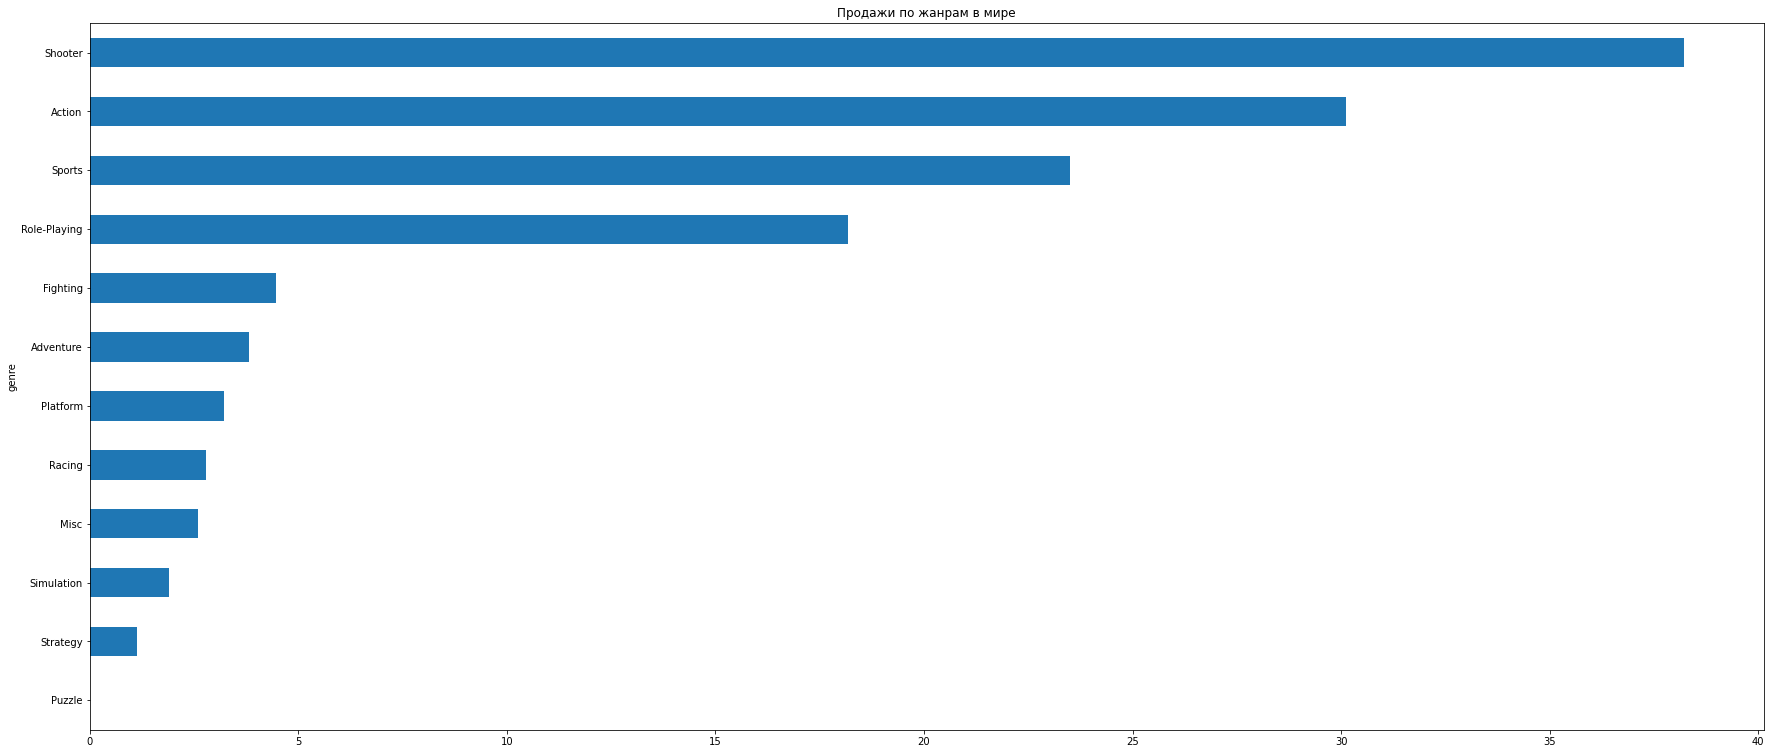

In [ ]:
print('Топ-5 жанров в мире\n', region_sales['sales'].sort_values(ascending = False).head(5))
region_sales['sales'].sort_values().plot(kind = 'barh', title = 'Продажи по жанрам в мире');

- Топ-5 жанров для Европы: Shooter, Sports, Action, Role-Playing, Racing
- Топ-5 жанров для Северной Америки:Shooter, Action, Sports,  Role-Playing, Fighting
- Топ-5 жанров для Японии: Action, Role-Playing, Adventure, Shooter, Misc
- Топ-5 жанров в мире: Shooter, Action, Sports,  Role-Playing, Fighting

Европа и Северная Америка по составу топовых платформ совпадают с мировым (за исключением Racing вместо Fighting в Европе), отличается порядок следования по убыванию популярности. Япония же отличается: в их топ Sport и  Fighting даже не вошли, зато есть Adventure и Misc.

Посмотрим,как распределны проценты продаж этих популярных жанров по регионам.

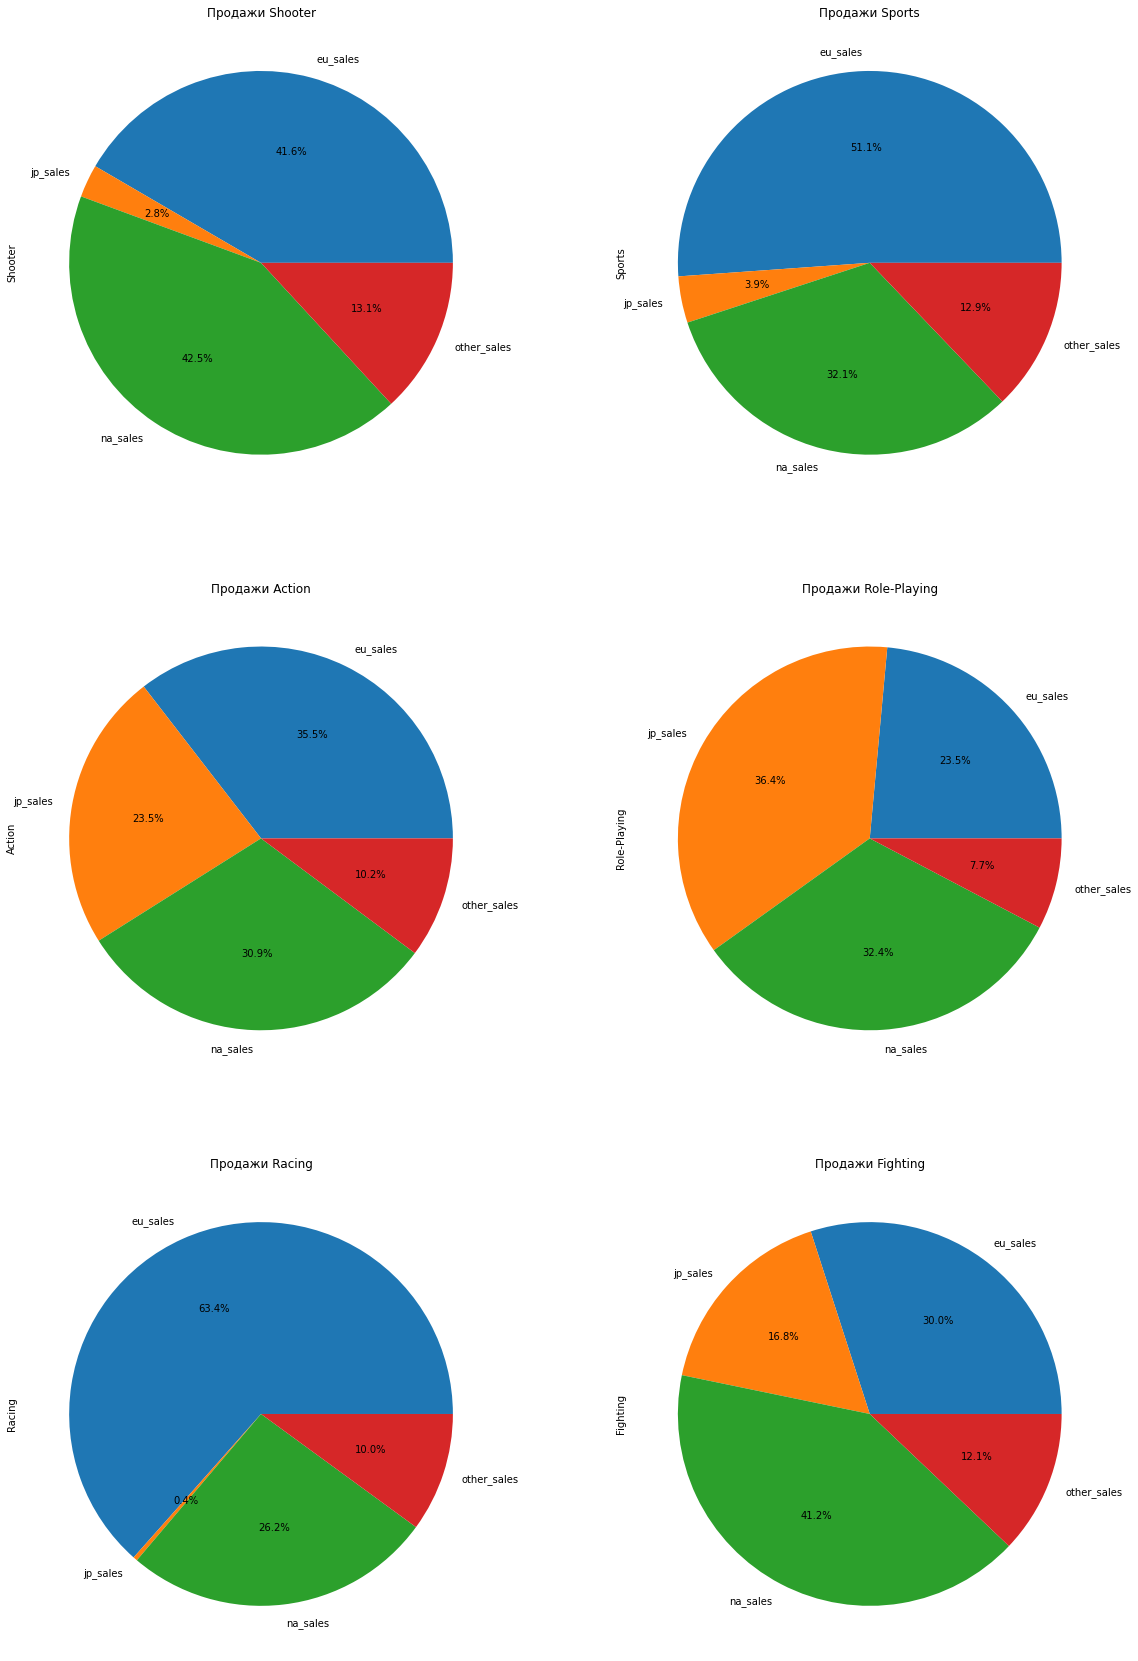

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
region_sales.loc['Shooter',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[0, 0], title = 'Продажи Shooter', autopct = '%1.1f%%');
region_sales.loc['Sports',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[0, 1], title = 'Продажи Sports', autopct = '%1.1f%%');
region_sales.loc['Action',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[1, 0], title = 'Продажи Action', autopct = '%1.1f%%');
region_sales.loc['Role-Playing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[1, 1], title = 'Продажи Role-Playing', autopct = '%1.1f%%');
region_sales.loc['Racing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[2, 0], title = 'Продажи Racing', autopct = '%1.1f%%');
region_sales.loc['Fighting',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axes[2, 1], title = 'Продажи Fighting', autopct = '%1.1f%%');

- Почти по половине рынка Shooter приходится на Европу(42%) и Северную Америку (43%). В Японии всего 3%.
- Половина рынка(51%) Sports приходится на Европу, треть(32%) - на Северную Америку. В Японии 13%.
- Практически с одинаковой долей, около трети, делят рынок Action Северная Америка (31%) и Европа (36%). В Японии 24%.
- Практически с одинаковой долей, около трети, делят рынок Role-Playing Северная Америка (32%) и Япония (36%). В Европе 24%.
- Больше половины рынка (63%) Racing приходится на Европу и лишь около трети (26%) - на Северную Америку. В Японии всего 0,5%.
- Больше трети рынка (41%) Fighting приходится на Северную Америку, в Европе чуть меньше трети(30%). В Японии 17%.

Оценим влияние рейтинга ESRB на продажи в каждом из регионов. Оценим данные за самый последний, 2016 год.

In [ ]:
region_sales = (df.loc[df['year_of_release']==2016,['rating','na_sales','eu_sales','jp_sales','other_sales','sales']]
                   .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','sales'], 'rating', aggfunc = 'sum')
                   .sort_values(by = 'eu_sales', ascending = False)
                  )
region_sales

,eu_sales,jp_sales,na_sales,other_sales,sales
rating,,,,,
M,16.54,1.20,15.67,4.94,38.35
E,13.61,1.07,7.97,3.09,25.74
T,9.79,2.27,8.95,3.11,24.12
TBD,7.47,14.32,8.53,2.28,32.60
E10+,3.81,0.45,3.81,1.06,9.13


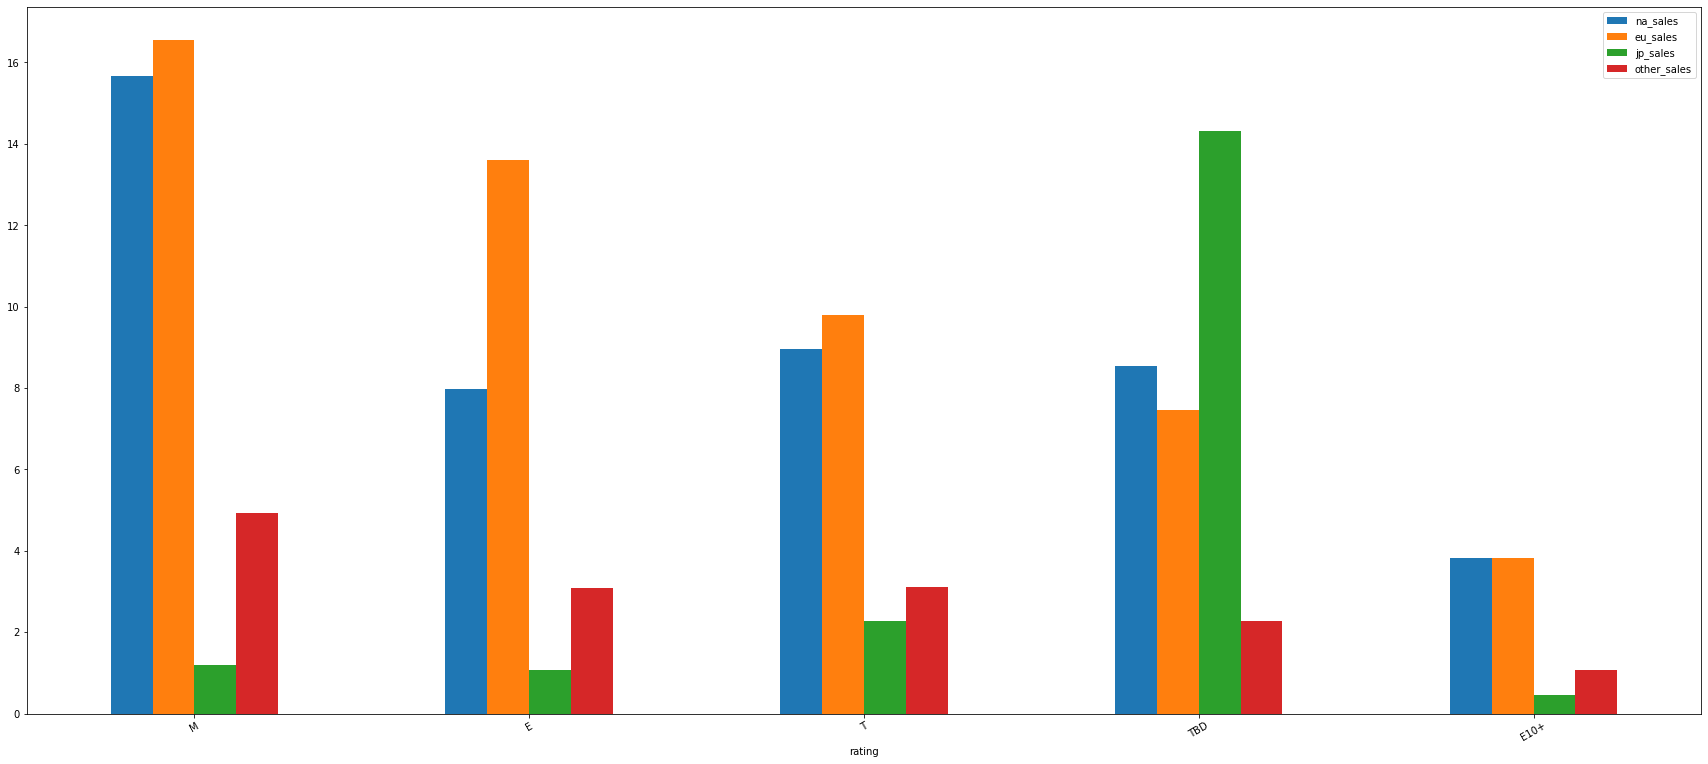

In [ ]:
region_sales[['na_sales','eu_sales','jp_sales','other_sales']].plot(kind = 'bar');
plt.xticks(rotation=30);

- В Европе,Северной Америке и прочих регионах(кроме Японии) рейтинг оказывает влияние - набиолее продаваемые игры с рейтингом М, наименее - Е10+
- В Японии наиболее продаваемые игры - без рейтинга ESRB. Скорее всего это связано с тем, что компания ESRB американская, существует множество других рейтингов и игры, популярные в Японии, имеют рейтинги по другим классификациям.

**Вывод.**

Топ-5 жанров:
- для Европы: Shooter, Sports, Action, Role-Playing, Racing
- для Северной Америки:Shooter, Action, Sports,  Role-Playing, Fighting
- для Японии: Action, Role-Playing, Adventure, Shooter, Misc
- в мире: Shooter, Action, Sports,  Role-Playing, Fighting

Топ-5 платформ:
- для Европы: PS4, XOne, PC, 3DS, WiiU
- для Северной Америки:PS4, XOne,3DS, WiiU, PC
- для Японии: 3DS, PS4, PSV,PS3, WiiU
- в мире: PS4, XOne, 3DS, PC, WiiU

Европа и Америка в целом соответствуют общемировым тенденциям с небольшими отклонениями.

Европейцы и американцы приверженцы новейших технологий - PS4, Xone и не прочь поиграть на PC.
Они предпочитают шутеры, игры про спорт и экшн, меньше думать -больше адреналина, хлеба и зрелищ))

Однако японский рынок совсем другой. Японцы предпочитают игры на консолях, а не на PC, продолжают покупать игры для PS3 и PSV, которые уже далеко не так популярны в других регионах, они не склонны к играм типа Гонки и Драки, а предпочитают Приключения и Аркады. Для эффективных продаж на японском рынке нужен свой собственных подход, основанный на знании этих особенностей.


Рейтинг ESRB оказывает влияние также только не на японский рынок.

## Проверка гипотез ##

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рассмотрим данные за последний, 2016 год.

In [ ]:
df[df['year_of_release'] ==2016]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,TBD,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,TBD,0.01


Уровень значимости примем равным 0.05, т.к. у нас еще нет какой-то действующей системы,которую необходимо было бы знаичтельно улучшить и такой уровень значимости для приблизительных выводов по данным гипотезам будет достаточным.
Для сравнения среднего двух выборок используем t-test, т.к. это выборки,а не генеральные совокупности и они независимые. У нас нет причин считать, что дисперсии этих выборок разные

**Гипотезы:**

Нулевая гипотеза Н0: "Средние пользовательские рейтинги платформ Xone и PC одинаковые"
Альтернативная гипотеза Н1: "Средние пользовательские рейтинги платформ Xone и PC не одинаковые"

Cформируем выборки по каждой из платформ:

In [ ]:
df_xone = df[(df['platform'] == 'XOne') & (df['user_score']>0) & (df['year_of_release'] == 2016)]
df_xone.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.0,0.17,84.0,5.5,E,2.65
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,1.46,0.74,0.0,0.22,78.0,3.1,M,2.42
709,Battlefield 1,XOne,2016,Shooter,1.28,0.77,0.0,0.20,87.0,8.2,M,2.25
758,Tom Clancy's The Division,XOne,2016,Shooter,1.29,0.68,0.0,0.20,80.0,6.9,M,2.17
1439,Gears of War 4,XOne,2016,Shooter,0.78,0.44,0.0,0.12,84.0,6.2,M,1.34


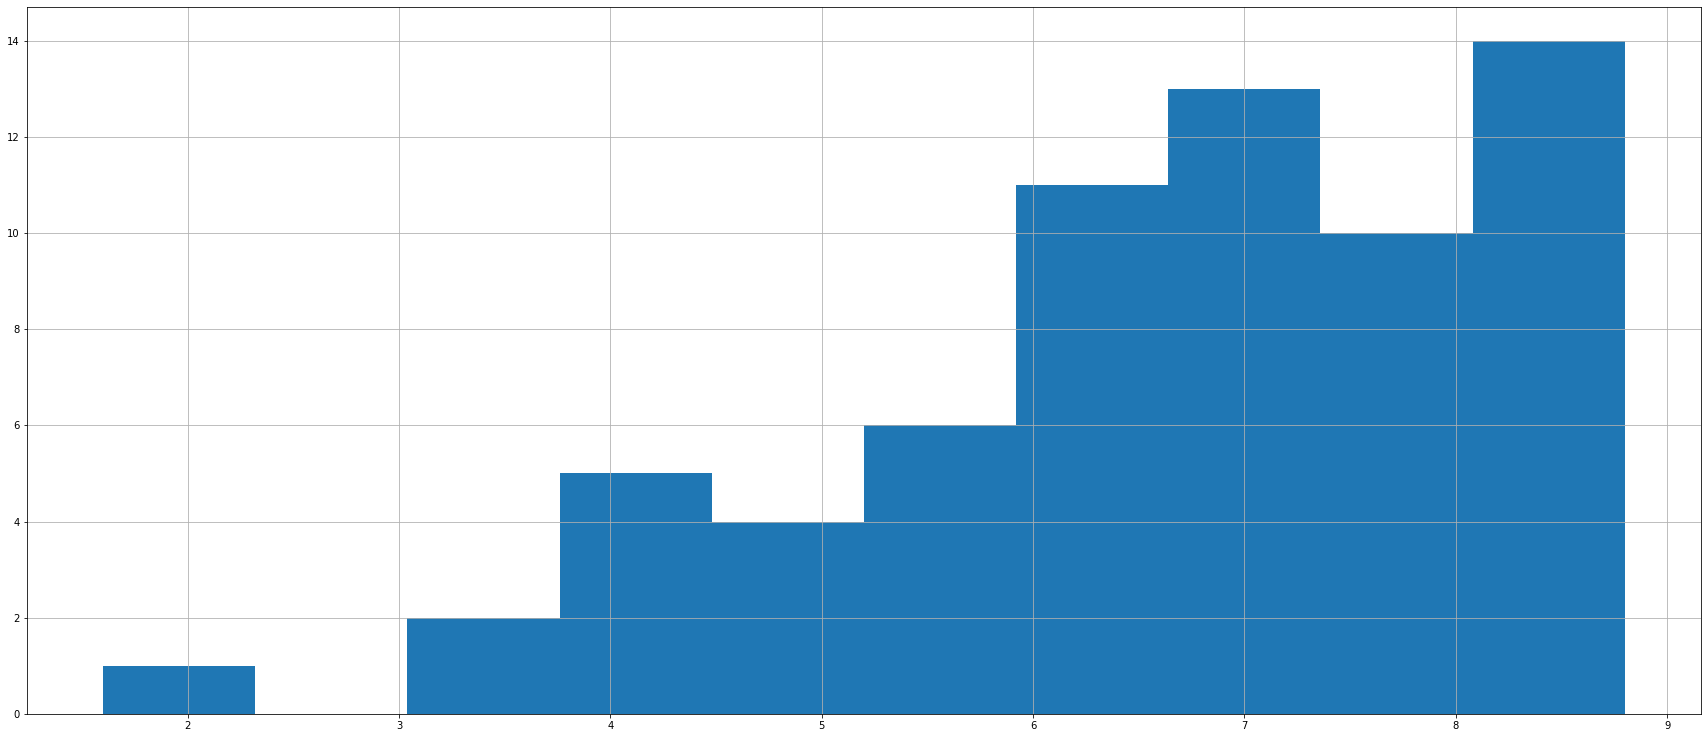

In [ ]:
df_xone['user_score'].hist(bins = 10);

In [ ]:
df_pc = df[(df['platform'] == 'PC') & (df['user_score']>0) & (df['year_of_release'] == 2016)]
df_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
3123,Farming Simulator 17,PC,2016,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3771,Overwatch,PC,2016,Shooter,0.25,0.24,0.0,0.04,91.0,6.8,T,0.53
4693,Tom Clancy's The Division,PC,2016,Shooter,0.22,0.15,0.0,0.04,79.0,5.8,M,0.41
5000,Battlefield 1,PC,2016,Shooter,0.11,0.24,0.0,0.03,88.0,7.6,M,0.38
5609,World of Warcraft: Legion,PC,2016,Role-Playing,0.13,0.16,0.0,0.03,88.0,7.5,T,0.32


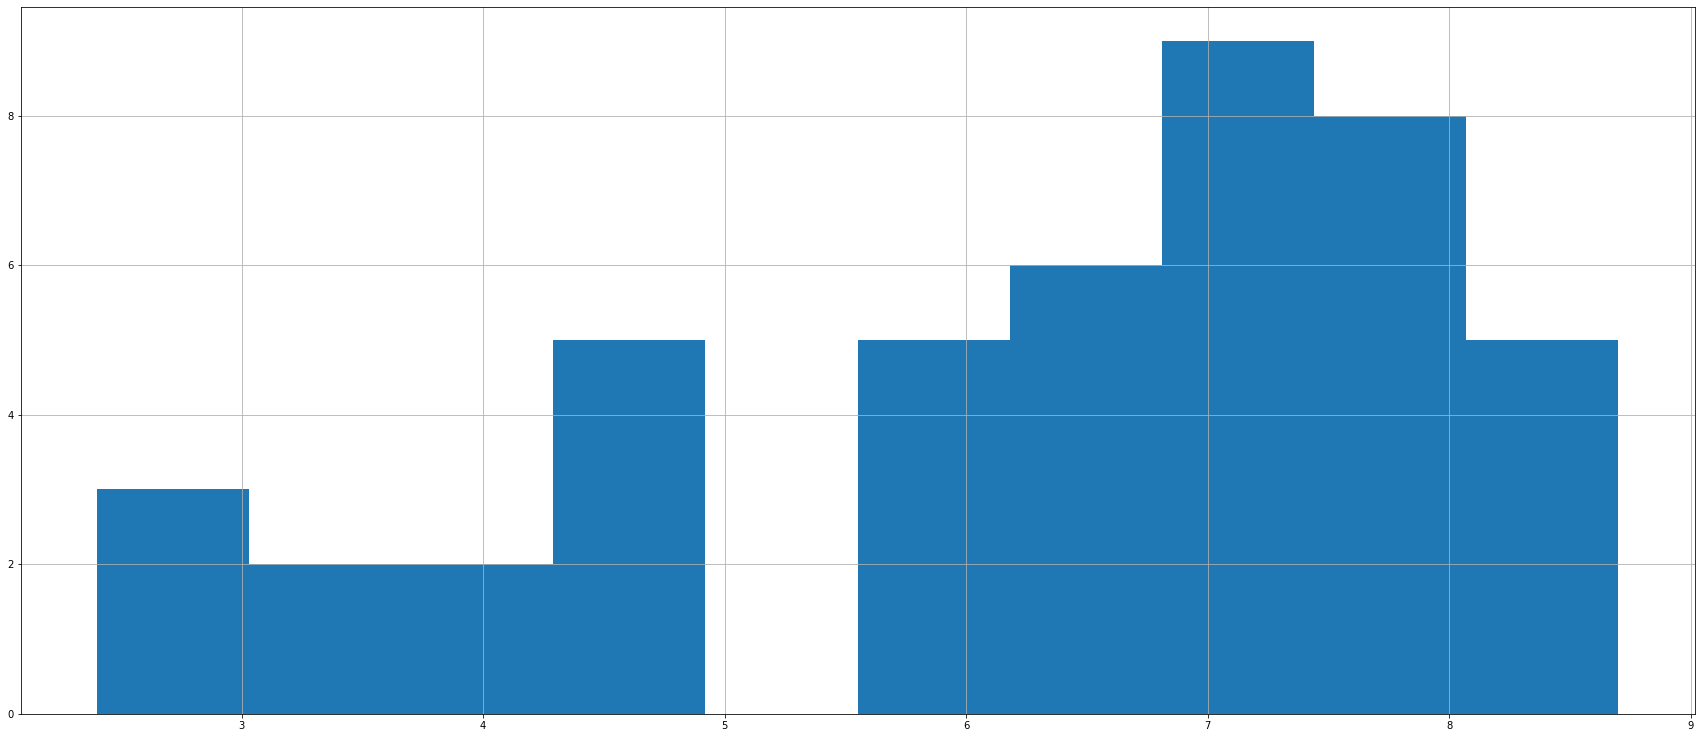

In [ ]:
df_pc['user_score'].hist(bins = 10);

- Нулевая гипотеза Н0: "Средние пользовательские рейтинги платформ Xone и PC одинаковые"
- Альтернативная гипотеза Н1: "Средние пользовательские рейтинги платформ Xone и PC не одинаковые"

Проведем t-test,сравним полученное значение Pvalue с выбранным уровнем статистической значимости и примем нулевую или альтернативную гипотезу.

In [ ]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_xone['user_score'], df_pc['user_score'])

print(f'p-значение: {results.pvalue:.5f}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние рейтинги платформ Xbox One и PC не одинаковые")
else:
    print("Нет оснований отвергать  нулевую гипотезу (средние рейтинги платформ Xbox One и PC одинаковые)")

p-значение: 0.33982
Нет оснований отвергать  нулевую гипотезу (средние рейтинги платформ Xbox One и PC одинаковые)


Гипотезы:

- Нулевая гипотеза Н0: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
- Альтернативная гипотеза Н1: "Средние пользовательские рейтинги жанров Action и Sports не одинаковые"

Cформируем выборки по каждому из жанров:

In [ ]:
df_action = df[(df['genre'] == 'Action') & (df['user_score']>0) & (df['year_of_release'] == 2016)]
df_action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,2.26
968,Mafia III,PS4,2016,Action,0.42,1.08,0.03,0.28,68.0,5.1,M,1.81
1056,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71.0,4.5,T,1.69
1806,Watch Dogs 2,PS4,2016,Action,0.37,0.58,0.00,0.18,83.0,7.8,M,1.13
2012,The Legend of Zelda: Twilight Princess HD,WiiU,2016,Action,0.56,0.30,0.08,0.09,86.0,8.4,T,1.03


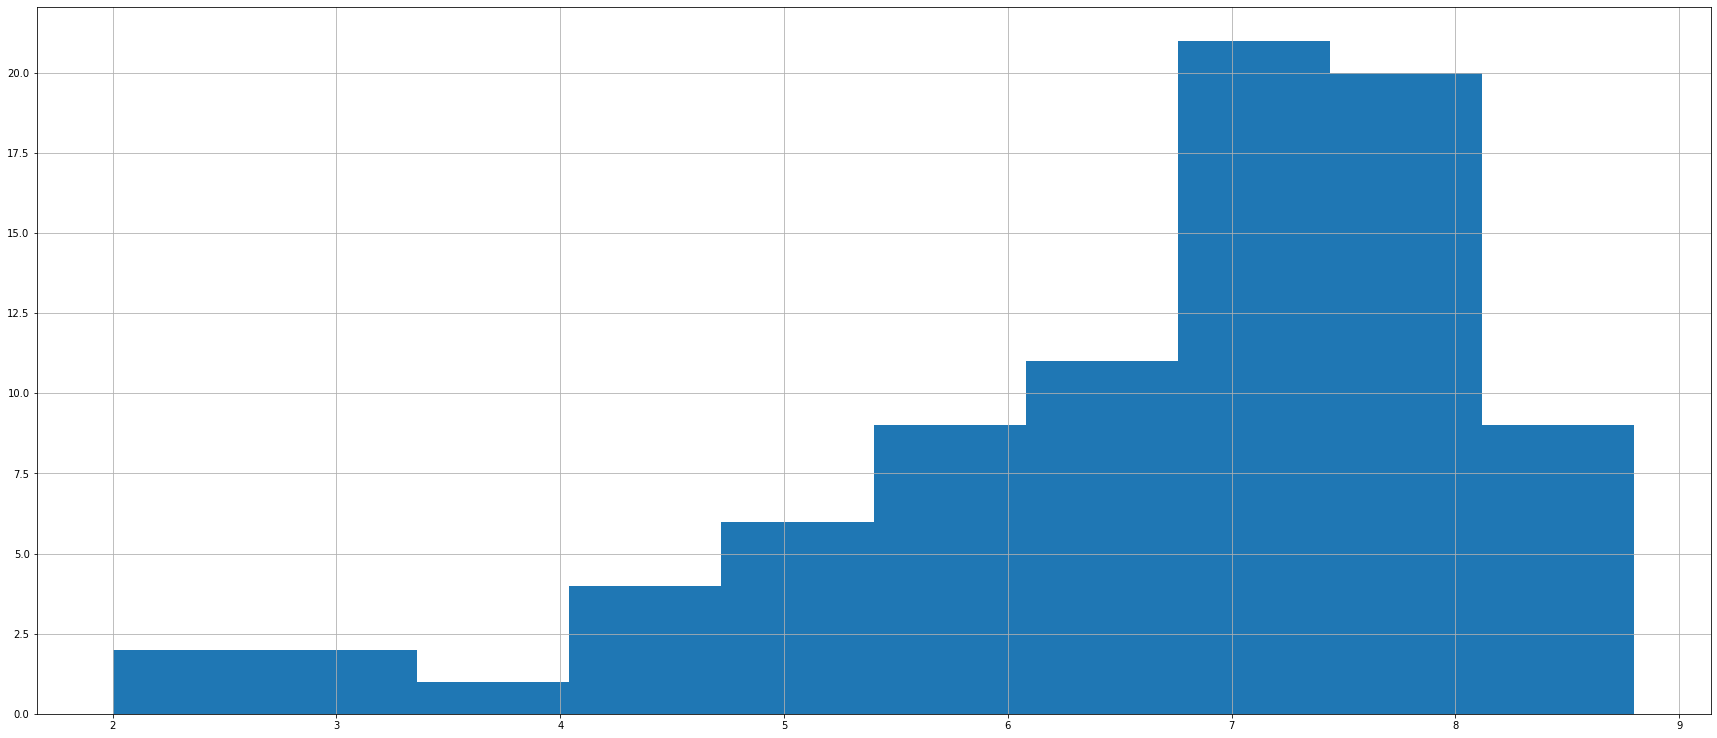

In [ ]:
df_action['user_score'].hist(bins = 10);

In [ ]:
df_sports = df[(df['genre'] == 'Sports') & (df['user_score']>0) & (df['year_of_release'] == 2016)]
df_sports.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
921,NBA 2K17,PS4,2016,Sports,1.25,0.27,0.02,0.34,88.0,6.7,E,1.88
1007,Madden NFL 17,PS4,2016,Sports,1.25,0.17,0.00,0.32,82.0,4.9,E,1.74
1615,Madden NFL 17,XOne,2016,Sports,1.08,0.02,0.00,0.13,83.0,5.9,E,1.23


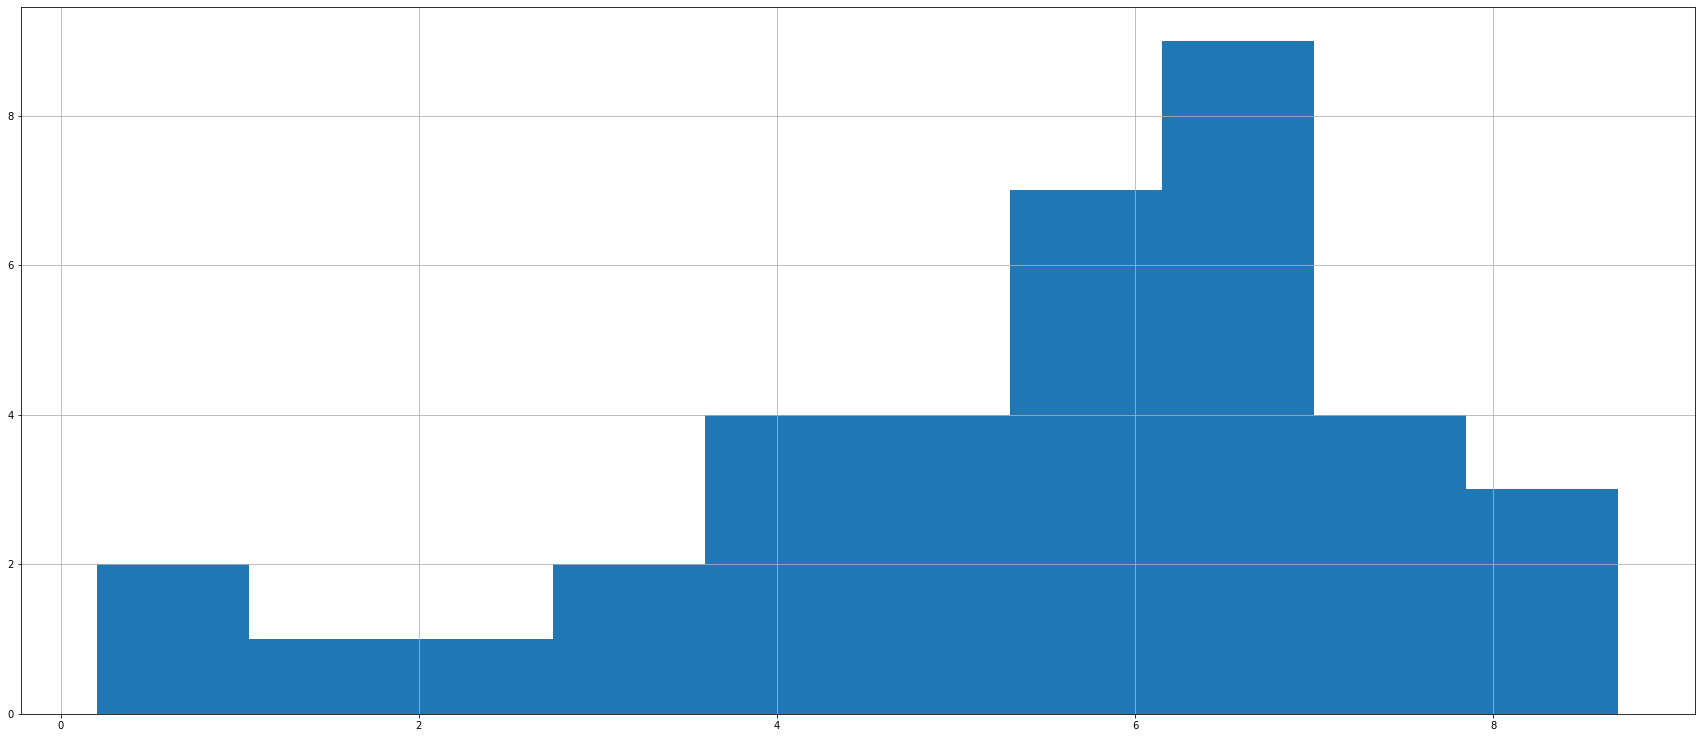

In [ ]:
df_sports['user_score'].hist(bins = 10);

- Нулевая гипотеза Н0: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"
- Альтернативная гипотеза Н1: "Средние пользовательские рейтинги жанров Action и Sports не одинаковые"

Проведем t-test,сравним полученное значение Pvalue с выбранным уровнем статистической значимости и примем нулевую или альтернативную гипотезу.

In [ ]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_action['user_score'], df_sports['user_score'])

print(f'p-значение: {results.pvalue:.5f}')

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние рейтинги жанров Action и Sports не одинаковые")
else:
    print("Нет оснований отвергать  нулевую гипотезу (средние рейтинги жанров Action и Sports одинаковые)")

p-значение: 0.00035
Отвергаем нулевую гипотезу, средние рейтинги жанров Action и Sports не одинаковые


**Вывод**

При анализе данных за 2016г со значением уровня значимости альфа=0.05 мы можем говорить о том, что у нас нет оснований отвергать нулевую гипотезу "Средние пользовательские рейтинги платформ Xone и PC одинаковые", а также есть основания отвергунть нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports одинаковые" и принять альтернативную - "Средние пользовательские рейтинги жанров Action и Sports не одинаковые".

## Общий вывод ##
**1.  При первичном знакомстве с данными были выявлены проблемы:**

- с наименованием колонок - разный регистр
- с типами данных в колонках Год релиза и Пользовательскя оценка.
- с пропусками: в колонках Наименование игры и Жанр всего по 2 пропуска -возможно они связаны с проблемой перекодировки названия, в колонке Год релиза пропусков не так много, возможно часть из них удастся закрыть либо по году релиза на альтернативной платформе(они редко сильно различаются), либо по году в наименовании игры (обычно год релиза на один год меньше или совпадает с этой датой, при условии, что она леит в диапазоне наших дат выхода игр). Множество пропусков в оценках и рейтингах может быть связано с годом выхода игры, а также с отсутствием выпуска данной игры под регион, для которого определяется ESRB.

**2. Проведена подготовка данных:**
- Наименованиястолбцов приведены к нижнему регистру
- Типы данных в столбцах к максимально подходящим
- Обработаны и удалены все пропуски в данных:
    - строки с пропусками в названии и жанре игры удалены
    - оценка игры пользователями "tmb"  расшифрована как "Будет определен" и заменена на Nan
    - все отсутствующие оценки критиков и пользователей заменены на 0
    - все отсутствующие рейтинги заменены на сигнальное значение "tmb"
    - пропуски в годах выхода игр заполнены медианным значением выхода той же игры на прочих платформах. Оставшиеся пропуски -годом из наименования игры, если год входил в рассматриваемый период годов. Оставшиеся записи с пропусками в году выхода игры удалены.
- Подсчитаны суммарные продажи каждой игры по всем регионам для дальнейшего анализа.

**3. Проведен исследовательский анализ данных:**
- До 94го выпускалось менее 100 игр в год, с 95 - более 200. Данные за старые годы пригодятся нам только для анализа времени жизни и успешности тех или иных игровых платформ,но вряд ли помогут с предсказанием успешности игр на 2017 год - меняются платформы, популярные жанры игр.
- К 1990 году платформа 2600 фактически перестала существовать, а на смену ей пришли GEN и SNES. Некоторые платформы просуществовали лишь с 90х по 2000е.
- Платформы приходят и уходят, средняя продолжительность платформы -8лет, и лишь PC живее всех живых, 26 лет и ей все нипочем.
- 2013 год выглядит достаточно переломным - приходит конец платформе DS, продажи PSP каасрофически падают, появляеся PS4. Поэтому эти года, 2013 -2016, принимаем за актуальный период для оценки закономерностей, определяющих успешность игры.
- Потенциально прибыльными за актуальный период являются платформы PS4, XOne. PS3 уступила позиции PS4, продажи 3DS так же неумолимо падают. Тенденция у всех платформ одна - общее снижение продаж с каждым годом.
- За рассматриваемый актуальный период большой разброс в объеме продаж испытали PS3, PS4, X360, Xone и 3DS. Максимальных продаж достигали PS4 и PS3. В среднем за данный период наибольшее число продаж было у PS4, Xone и 3DS, а наименьшее -у DS, PSP.
- Связь между оценкой критиков и продажами прямая, умеренная (силой около 0.4)
- Статистически значимая связь между оценкой пользователей и продажами отсутствует, зак исключением платформы 3DSБ популярной в основном в Японии.
- Налицо падение продаж во всех жанрах, однако в заметен рост к 2015г у шутеров, платформенных игр в 2014, стабильное падение продаж к экшн игр и пазлов.
- За актуальный период в среднем наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и платформенные. Наименьшие продажи у приключенческих игр.
- За 2016г наибольшие продажи пришлись на шутеры, за ними следуют спортивные игры и драки. Наименьшие продажи у пазлов.

**4. Составлен портрет пользователя каждого региона:**
- Топ-5 жанров:
    - для Европы: Shooter, Sports, Action, Role-Playing, Racing
    - для Северной Америки:Shooter, Action, Sports,  Role-Playing, Fighting
    - для Японии: Action, Role-Playing, Adventure, Shooter, Misc
    - в мире: Shooter, Action, Sports,  Role-Playing, Fighting

- Топ-5 платформ:
    - для Европы: PS4, XOne, PC, 3DS, WiiU
    - для Северной Америки:PS4, XOne,3DS, WiiU, PC
    - для Японии: 3DS, PS4, PSV,PS3, WiiU
    - в мире: PS4, XOne, 3DS, PC, WiiU

- Европа и Америка в целом соответствуют общемировым тенденциям с небольшими отклонениями.  Европейцы и американцы приверженцы новейших технологий - PS4, Xone и не прочь поиграть на PC. Они предпочитают шутеры, игры про спорт и экшн, меньше думать -больше адреналина, хлеба и зрелищ))
- Однако японский рынок совсем другой. Японцы предпочитают игры на консолях, а не на PC, продолжают покупать игры для PS3 и PSV, которые уже далеко не так популярны в других регионах, они не склонны к играм типа Гонки и Драки, а предпочитают Приключения и Аркады. Для эффективных продаж на японском рынке нужен свой собственных подход, основанный на знании этих особенностей.
- Рейтинг ESRB оказывает влияние также только не на японский рынок.

**5. Проверены гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sportsразные.

При анализе данных за 2016г со значением уровня значимости альфа=0.05 мы можем говорить о том, что у нас нет оснований отвергать нулевую гипотезу "Средние пользовательские рейтинги платформ Xone и PC одинаковые", а также есть основания отвергнуть нулевую гипотезу "Средние пользовательские рейтинги жанров Action и Sports одинаковые" и принять альтернативную - "Средние пользовательские рейтинги жанров Action и Sports не одинаковые".